<p align="center">
<img src="Images/sorbonne_logo.png" alt="Logo" width="300"/>
</p>

# **Module 2 - Statistics & Data Plotting**

* **Author**: Elia Landini
* **Student ID**: 12310239
* **Course**: EESM2-Financial Economics 
* **Supervisor**: XXXXXXXXXXXXXXXX
* **Reference Repository**: https://github.com/EliaLand/PVAR_japan_endogenous_money

### **1) REQUIREMENTS SET-UP**

In [34]:
# Requirements.txt file installation
# !pip install -r requirements.txt

In [35]:
# Libraries import
import warnings
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import levene
from scipy.stats import ks_2samp
from scipy.stats import kstest
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.filters.hp_filter import hpfilter
import sklearn.tree
import sklearn.metrics
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix,
                             precision_score, recall_score, f1_score,
                             accuracy_score, precision_recall_curve, auc, 
                             RocCurveDisplay, ConfusionMatrixDisplay)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight
import plotly.express as px
import openpyxl as pxl
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from IPython.display import Image
import itertools
from arch.unitroot import PhillipsPerron

### **2) DESCRIPTIVE STATISTICS**

In [36]:
# df import
jp_aggregated_df = pd.read_csv("Data/Aggregated/jp_aggregated_df.csv")
jp_aggregated_df

Country     Time  Monetary Aggregates - M1 (JPY)  \
0        JP  1950-12                             NaN   
1        JP  1951-01                             NaN   
2        JP  1951-02                             NaN   
3        JP  1951-03                             NaN   
4        JP  1951-04                             NaN   
..      ...      ...                             ...   
898      JP  2025-10                             NaN   
899      JP  2025-11                             NaN   
900      JP  2025-12                             NaN   
901      JP  2026-01                             NaN   
902      JP  2026-02                             NaN   

     Monetary Aggregates - M2 (JPY)  Monetary Aggregates - M3 (JPY)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
..                              ...                             ...   
898                             NaN                             NaN   
899                             NaN                             NaN   
900                             NaN                             NaN   
901                             NaN                             NaN   
902                             NaN                             NaN   

     Total Credit - Private Non-Financial (%GDP)  \
0                                            NaN   
1                                            NaN   
2                                            NaN   
3                                            NaN   
4                                            NaN   
..                                           ...   
898                                          NaN   
899                                          NaN   
900                                          NaN   
901                                          NaN   
902                                          NaN   

     Total Credit - General Government (%GDP)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
898                                       NaN   
899                                       NaN   
900                                       NaN   
901                                       NaN   
902                                       NaN   

     Total Credit - Households & NPISHs (%GDP)  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   
..                                         ...   
898                                        NaN   
899                                        NaN   
900                                        NaN   
901                                        NaN   
902                                        NaN   

     Total Treasury Reserves (- Gold)  10-Year Gov Bond Yields (%)  ...  \
0                        5.980000e+02                          NaN  ...   
1                                 NaN                          NaN  ...   
2                                 NaN                          NaN  ...   
3                                 NaN                          NaN  ...   
4                                 NaN                          NaN  ...   
..                                ...                          ...  ...   
898                      1.238269e+06                        1.655  ...   
899                      1.245364e+06                        1.

In [37]:
# Metrics clusters for plotting
metrics_group = {
    "Monetary Aggregates" : ["Monetary Aggregates - M1 (JPY)", "Monetary Aggregates - M2 (JPY)", "Monetary Aggregates - M3 (JPY)"],
    "Credit Metrics" : ["Total Credit - General Government (%GDP)", "Total Credit - Households & NPISHs (%GDP)", "Total Credit - Private Non-Financial (%GDP)"],
    "Reserves" : ["Total Treasury Reserves (- Gold)"],
    "Monetary Policy Proxies (Yields)" : ["10-Year Gov Bond Yields (%)", "Call Money/Interbank Immediate (%)", "Est. 1-year Neutral Interest Rate (%)", "Est. 10-year Neutral Interest Rate (%)"], 
    "Exchange Rate" : ["USD-JPY reer CPI-based (Index 2015=100)", "JPY-USD Spot Exchange Rate"],
    "Output-Trends": ["Real GDP (billions chained 2015 JPY)"],
    "Consumption Prices": ["HICP (NSA)"],
    "Debt Metrics" : ["Central Government Debt (% GDP)", "Domestic Private Debt Securities (% GDP)", "Domestic Public Debt Securities (% GDP)"],
    "Banking Sector" : ["Loan Interest Rate (%)", "Deposit Interest Rate (%)", "1615.T-Price"],
    "Controls" : ["10-Year US T-Bills Yield (%)", "CBOE-VIX"],
    "BoJ Total Assets" : ["BoJ’s Total Assets (100 Million Yen)"]
}

In [38]:
# Descriptive statistics summary table - aggregate data
df = jp_aggregated_df.copy()
df.describe()

Monetary Aggregates - M1 (JPY)  Monetary Aggregates - M2 (JPY)  \
count                    7.670000e+02                    7.460000e+02   
mean                     2.799125e+14                    3.659118e+14   
std                      2.845290e+14                    3.038362e+14   
min                      4.021870e+12                    3.564500e+12   
25%                      5.802214e+13                    4.820300e+13   
50%                      1.518072e+14                    3.102086e+14   
75%                      4.826217e+14                    6.484915e+14   
max                      1.081546e+15                    9.632187e+14   

       Monetary Aggregates - M3 (JPY)  \
count                    5.270000e+02   
mean                     9.357442e+14   
std                      3.323003e+14   
min                      2.952000e+14   
25%                      7.623000e+14   
50%                      9.926000e+14   
75%                      1.131859e+15   
max                      1.597004e+15   

       Total Credit - Private Non-Financial (%GDP)  \
count                                   729.000000   
mean                                    163.508642   
std                                      27.939645   
min                                     110.800000   
25%                                     139.100000   
50%                                     162.100000   
75%                                     183.700000   
max                                     214.200000   

       Total Credit - General Government (%GDP)  \
count                                333.000000   
mean                                 175.399099   
std                                   41.642344   
min                                   90.100000   
25%                                  143.600000   
50%                                  183.600000   
75%                                  211.500000   
max                                  237.700000   

       Total Credit - Households & NPISHs (%GDP)  \
count                                 729.000000   
mean                                   54.214815   
std                                    15.385155   
min                                    19.900000   
25%                                    44.100000   
50%                                    61.000000   
75%                                    66.900000   
max                                    71.100000   

       Total Treasury Reserves (- Gold)  10-Year Gov Bond Yields (%)  \
count                      8.360000e+02                   445.000000   
mean                       4.140074e+05                     1.810333   
std                        5.108432e+05                     1.825189   
min                        5.980000e+02                    -0.280000   
25%                        1.330404e+04                     0.566000   
50%                        8.137040e+04                     1.333000   
75%                        9.825051e+05                     1.948000   
max                        1.371116e+06                     8.032000   

       Call Money/Interbank Immediate (%)  \
count                          487.000000   
mean                             1.247216   
std                              2.185570   
min                             -0.071000   
25%                              0.001000   
50%                              0.091000   
75%                              0.804870   
max                              8.278130   

       Est. 1-year Neutral Interest Rate (%)  ...  \
count                             372.000000  ...   
mean                                0.353968  ...   
std                                 0.580089  ...   
min                                -0.420000  ...   
25%                                -0.260500  ...   
50%                                 0.243500  ...   
75%                                 0.864250  ...   
max                                 1.380000  ...   

       Real GDP (billions chai

### **3) STATIONARITY TESTING**

In [39]:
# Autocorrelation coefficients AR(1)
# Drop non-numeric columns and rows with missing values
df = jp_aggregated_df.copy()
jp_aggregated_numeric = df.drop(columns=["Country", "Time"]).dropna()

# AR(1) autocorrelation for each variable
ar1_results = {}
for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col]

# (!!!) lag-1 autocorrelation
    ar1 = series.autocorr(lag=1)
    ar1_results[col] = ar1

# Better to create a dataframe to display the results
jp_ar1_df = pd.DataFrame.from_dict(ar1_results, orient="index", columns=["AR(1)"])
jp_ar1_df

AR(1)
Monetary Aggregates - M1 (JPY)               0.999761
Monetary Aggregates - M2 (JPY)               0.999878
Monetary Aggregates - M3 (JPY)               0.999875
Total Credit - Private Non-Financial (%GDP)  0.982539
Total Credit - General Government (%GDP)     0.997181
Total Credit - Households & NPISHs (%GDP)    0.975292
Total Treasury Reserves (- Gold)             0.990202
10-Year Gov Bond Yields (%)                  0.983519
Call Money/Interbank Immediate (%)           0.985473
Est. 1-year Neutral Interest Rate (%)        0.985248
Est. 10-year Neutral Interest Rate (%)       0.983576
USD-JPY reer CPI-based (Index 2015=100)      0.979713
JPY-USD Spot Exchange Rate                   0.982903
HICP (NSA)                                   0.978858
Real GDP (billions chained 2015 JPY)         0.975976
Central Government Debt (% GDP)              0.991059
Domestic Private Debt Securities (% GDP)     0.988347
Domestic Public Debt Securities (% GDP)      0.911522
BoJ’s Total Assets (100 Million Yen)         0.999255
Loan Interest Rate (%)                       0.908583
Deposit Interest Rate (%)                    0.980838
1615.T-Price                                 0.947695
10-Year US T-Bills Yield (%)                 0.952874
CBOE-VIX                                     0.878637

In [40]:
# Unit-root Testing - Adfuller Test 
# Drop non-numeric columns and handle missing data
df = jp_aggregated_df.copy()
jp_aggregated_numeric = df.drop(columns=["Country", "Time"]).dropna()

# (!!!) We need to initialize the results as empty list before execuding the test
results = []

for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col]

# As before, we extract the AR(1) coefficients
    ar1 = series.autocorr(lag=1)

# Augmented Dickey-Fuller (ADF) unit root test 
    adf_result = adfuller(series, autolag="AIC")
    adf_stat = adf_result[0]
    p_value = adf_result[1]
    crit_values = adf_result[4]

    results.append({
        "Variable": col,
        "AR(1)": ar1,
        "ADF Statistic": adf_stat,
        "p-value": p_value,
        "Stationary - Absence of unit-root (HP1)": "Yes" if p_value < 0.05 else "No"
    })

jp_adf_df = pd.DataFrame(results)
jp_adf_df

Variable     AR(1)  ADF Statistic  \
0                Monetary Aggregates - M1 (JPY)  0.999761       2.145042   
1                Monetary Aggregates - M2 (JPY)  0.999878       7.421314   
2                Monetary Aggregates - M3 (JPY)  0.999875       6.495981   
3   Total Credit - Private Non-Financial (%GDP)  0.982539      -1.418998   
4      Total Credit - General Government (%GDP)  0.997181      -3.315840   
5     Total Credit - Households & NPISHs (%GDP)  0.975292      -1.371612   
6              Total Treasury Reserves (- Gold)  0.990202      -1.598362   
7                   10-Year Gov Bond Yields (%)  0.983519      -0.734868   
8            Call Money/Interbank Immediate (%)  0.985473      -3.532602   
9         Est. 1-year Neutral Interest Rate (%)  0.985248      -1.543562   
10       Est. 10-year Neutral Interest Rate (%)  0.983576      -1.906791   
11      USD-JPY reer CPI-based (Index 2015=100)  0.979713      -1.479411   
12                   JPY-USD Spot Exchange Rate  0.982903      -1.249721   
13                                   HICP (NSA)  0.978858      -1.024707   
14         Real GDP (billions chained 2015 JPY)  0.975976      -0.478766   
15              Central Government Debt (% GDP)  0.991059      -1.845789   
16     Domestic Private Debt Securities (% GDP)  0.988347      -1.449174   
17      Domestic Public Debt Securities (% GDP)  0.911522      -2.172096   
18         BoJ’s Total Assets (100 Million Yen)  0.999255      -0.280268   
19                       Loan Interest Rate (%)  0.908583      -2.635089   
20                    Deposit Interest Rate (%)  0.980838      -3.938698   
21                                 1615.T-Price  0.947695      -2.483042   
22                 10-Year US T-Bills Yield (%)  0.952874      -2.388438   
23                                     CBOE-VIX  0.878637      -2.560290   

     p-value Stationary - Absence of unit-root (HP1)  
0   0.998834                                      No  
1   1.000000                                      No  
2   1.000000                                      No  
3   0.573135                                      No  
4   0.014185                                     Yes  
5   0.595807                                      No  
6   0.484416                                      No  
7   0.837510                                      No  
8   0.007188                                     Yes  
9   0.511863                                      No  
10  0.328873                                      No  
11  0.543671                                      No  
12  0.651850                                      No  
13  0.744147                                      No  
14  0.896094                                      No  
15  0.357977                                      No  
16  0.558488                                      No  
17  0.216528                                      No  
18  0.928253                                      No  
19  0.085960                                      No  
20  0.001768                                     Yes  
21  0.119655                                      No  
22  0.145026                                      No  
23  0.101485                                      No

In [41]:
# Unit-root Testing - Phillips-Perron Test 
# (!!!) We need to initialize the results as empty list before execuding the test
pp_results = []

for col in jp_aggregated_numeric.columns:
    series = jp_aggregated_numeric[col].dropna()
    
# Phillips–Perron test 
# (!!!) From arch instead of stats.models is much smoother
    test = PhillipsPerron(series)
    pp_results.append({
        "Variable": col,
        "PP Statistic": test.stat,
        "p-value": test.pvalue,
        "Stationary - Absence of unit-root (HP1)": "Yes" if test.pvalue < 0.05 else "No"
    })

jp_pp_df = pd.DataFrame(pp_results)
jp_pp_df

Variable  PP Statistic   p-value  \
0                Monetary Aggregates - M1 (JPY)      5.499319  1.000000   
1                Monetary Aggregates - M2 (JPY)     15.311005  1.000000   
2                Monetary Aggregates - M3 (JPY)     11.710651  1.000000   
3   Total Credit - Private Non-Financial (%GDP)     -1.306735  0.626085   
4      Total Credit - General Government (%GDP)     -2.363247  0.152379   
5     Total Credit - Households & NPISHs (%GDP)     -1.806462  0.377258   
6              Total Treasury Reserves (- Gold)     -1.615145  0.475275   
7                   10-Year Gov Bond Yields (%)     -0.282190  0.927989   
8            Call Money/Interbank Immediate (%)     -2.927652  0.042226   
9         Est. 1-year Neutral Interest Rate (%)     -1.479774  0.543492   
10       Est. 10-year Neutral Interest Rate (%)     -1.679843  0.441527   
11      USD-JPY reer CPI-based (Index 2015=100)     -1.127288  0.704068   
12                   JPY-USD Spot Exchange Rate     -1.198634  0.674183   
13                                   HICP (NSA)     -0.992455  0.756006   
14         Real GDP (billions chained 2015 JPY)     -0.891691  0.790696   
15              Central Government Debt (% GDP)     -2.381596  0.146998   
16     Domestic Private Debt Securities (% GDP)     -1.449382  0.558386   
17      Domestic Public Debt Securities (% GDP)     -2.281413  0.178033   
18         BoJ’s Total Assets (100 Million Yen)      5.103848  1.000000   
19                       Loan Interest Rate (%)     -1.786990  0.386940   
20                    Deposit Interest Rate (%)     -2.433118  0.132607   
21                                 1615.T-Price     -2.531710  0.107948   
22                 10-Year US T-Bills Yield (%)     -1.955140  0.306582   
23                                     CBOE-VIX     -2.380262  0.147385   

   Stationary - Absence of unit-root (HP1)  
0                                       No  
1                                       No  
2                                       No  
3                                       No  
4                                       No  
5                                       No  
6                                       No  
7                                       No  
8                                      Yes  
9                                       No  
10                                      No  
11                                      No  
12                                      No  
13                                      No  
14                                      No  
15                                      No  
16                                      No  
17                                      No  
18                                      No  
19                                      No  
20                                      No  
21                                      No  
22                                      No  
23                                      No

### **4) NON-STATIONARITY CORRECTIONS**

In [42]:
# Non-Stationarity Corrections - Log-Difference Transformations
# (!!!) Basically we need a detrending transformation for all the variables as expected, given the undisputable presence of unit-root root and so non-sttaionarity
# (!!!) Autocorrelation is also evident, suggesting a marked time-dependent component, and so a trend, so we'll opt for both log transformations as well as first differences 
df = jp_aggregated_df.copy()
trans_df = df[["Country", "Time"]].copy()

# Transformations: 
# - Monetary Aggregates: I(1) nominal levels (levels non-stationary, but first-differences are I(0), stationary)
# - Reserves: I(1), level series of policy shocks 
# - Exchange Rate: Log-difference (returns)
# - Consumption Prices: Log-difference (inflation)
# - Banking metruics: Log-difference (returns)
# - BoJ’s Total Assets: CA smoothing 
log_transformed_variables = ["Monetary Aggregates - M1 (JPY)", "Monetary Aggregates - M2 (JPY)", "Monetary Aggregates - M3 (JPY)",
                             "Total Treasury Reserves (- Gold)",
                             "USD-JPY reer CPI-based (Index 2015=100)", "JPY-USD Spot Exchange Rate",
                             "HICP (NSA)",
                             "1615.T-Price",
                             "BoJ’s Total Assets (100 Million Yen)"
                            ]

# Log-Difference Transformed Variables 
for var in log_transformed_variables:
    trans_df[f"LogDiff-{var}"] = np.log(df[f"{var}"]).diff()
trans_df


Country     Time  LogDiff-Monetary Aggregates - M1 (JPY)  \
0        JP  1950-12                                     NaN   
1        JP  1951-01                                     NaN   
2        JP  1951-02                                     NaN   
3        JP  1951-03                                     NaN   
4        JP  1951-04                                     NaN   
..      ...      ...                                     ...   
898      JP  2025-10                                     NaN   
899      JP  2025-11                                     NaN   
900      JP  2025-12                                     NaN   
901      JP  2026-01                                     NaN   
902      JP  2026-02                                     NaN   

     LogDiff-Monetary Aggregates - M2 (JPY)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
898                                     NaN   
899                                     NaN   
900                                     NaN   
901                                     NaN   
902                                     NaN   

     LogDiff-Monetary Aggregates - M3 (JPY)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
898                                     NaN   
899                                     NaN   
900                                     NaN   
901                                     NaN   
902                                     NaN   

     LogDiff-Total Treasury Reserves (- Gold)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
898                                  0.000845   
899                                  0.005714   
900                                  0.005796   
901                                  0.005291   
902                                       NaN   

     LogDiff-USD-JPY reer CPI-based (Index 2015=100)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
..                                               ...   
898                                        -0.019483   
899                                        -0.021022   
900                                        -0.013176   
901                                        -0.013183   
902                                              NaN   

     LogDiff-JPY-USD Spot Exchange Rate  LogDiff-HICP (NSA)  \
0                                   NaN                 NaN   
1                                   NaN                 NaN   
2                                   NaN                 NaN   
3                                   NaN                 NaN   
4                                   NaN                 NaN   
..                                  ...                 ...   
898                            0.023339                 NaN   
899                            0.024710                 NaN   
900                            0.004976                 NaN   
901                            0.004706                 NaN   
902                                 NaN                 NaN   

     LogDiff-1615.T-Price  LogDiff-BoJ’s Total Assets (100 Million Yen)  
0           

In [43]:
# Non-Stationarity Corrections - AR(1) detrending 
df = jp_aggregated_df.copy()
trans_df = trans_df.copy()

# Transformations: 
# - Credit Metrics: AR(1) detrending (cyclical credit gap), we want to remove the persistence of credit t-1, we can reduce this relatiosnship to:
# (!!!) c_t = α + ρc_t−1​ + ε_t, we take the residuals 
# (!!!) first differences are to aggresive for credit metrics, they destroy medium-term cycles, signal-to-noise
# (!!!) credit metrics tend to be highly-persistent I(0) and near-unit-root stationary (so it might result non-stationary, but it is actually slowly mean reverting, we want to keep cyclical deviations)
# - Monetary Policy Proxies: AR(1) detrending (policy shocks), rates are persistent but not truly I(1)
# - Debt Metrics: same reasoning as for credit 
# - Banking metrics: same reasoning as for yields
# - VIX index
ar1detrend_transformed_variables = ["Total Credit - General Government (%GDP)", "Total Credit - Households & NPISHs (%GDP)", "Total Credit - Private Non-Financial (%GDP)",
                                    "10-Year Gov Bond Yields (%)", "Call Money/Interbank Immediate (%)", "Est. 1-year Neutral Interest Rate (%)", "Est. 10-year Neutral Interest Rate (%)",
                                    "Central Government Debt (% GDP)", "Domestic Private Debt Securities (% GDP)", "Domestic Public Debt Securities (% GDP)",
                                    "Loan Interest Rate (%)", "Deposit Interest Rate (%)",
                                    "10-Year US T-Bills Yield (%)", "CBOE-VIX"
                                   ]

# AR(1) detrending Transformed Variables 
for var in ar1detrend_transformed_variables:
# Lag-1 Reg
# (!!!) It triggers an errors as we don't specificy the model time index and frequency. It should be harmless, it only deactivates forecasting features.
    model = AutoReg(df[f"{var}"].dropna(), lags=1, old_names=False).fit()
# Residuals 
    trans_df[f"AR(1)detrend-{var}"] = df[f"{var}"] - model.fittedvalues
trans_df

d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
d:\Conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use

Country     Time  LogDiff-Monetary Aggregates - M1 (JPY)  \
0        JP  1950-12                                     NaN   
1        JP  1951-01                                     NaN   
2        JP  1951-02                                     NaN   
3        JP  1951-03                                     NaN   
4        JP  1951-04                                     NaN   
..      ...      ...                                     ...   
898      JP  2025-10                                     NaN   
899      JP  2025-11                                     NaN   
900      JP  2025-12                                     NaN   
901      JP  2026-01                                     NaN   
902      JP  2026-02                                     NaN   

     LogDiff-Monetary Aggregates - M2 (JPY)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
898                                     NaN   
899                                     NaN   
900                                     NaN   
901                                     NaN   
902                                     NaN   

     LogDiff-Monetary Aggregates - M3 (JPY)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
898                                     NaN   
899                                     NaN   
900                                     NaN   
901                                     NaN   
902                                     NaN   

     LogDiff-Total Treasury Reserves (- Gold)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
898                                  0.000845   
899                                  0.005714   
900                                  0.005796   
901                                  0.005291   
902                                       NaN   

     LogDiff-USD-JPY reer CPI-based (Index 2015=100)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
..                                               ...   
898                                        -0.019483   
899                                        -0.021022   
900                                        -0.013176   
901                                        -0.013183   
902                                              NaN   

     LogDiff-JPY-USD Spot Exchange Rate  LogDiff-HICP (NSA)  \
0                                   NaN                 NaN   
1                                   NaN                 NaN   
2                                   NaN                 NaN   
3                                   NaN                 NaN   
4                                   NaN                 NaN   
..                                  ...                 ...   
898                            0.023339                 NaN   
899                            0.024710                 NaN   
900                            0.004976                 NaN   
901                            0.004706                 NaN   
902                                 NaN                 NaN   

     LogDiff-1615.T-Price  ...  \
0                     NaN  ...   
1                 

In [44]:
# Non-Stationarity Corrections - HP-filter cycle 
df = jp_aggregated_df.copy()
trans_df = trans_df.copy()

# Transformations: 
# - Output Trends: HP-filter cycle, trend smoothing
hpfilter_transformed_variables = ["Real GDP (billions chained 2015 JPY)"
                                 ]

# HP-filter cycle Transformed Variables 
for var in hpfilter_transformed_variables:    
    cycle, trend = hpfilter(
        np.log(df[f"{var}"]).dropna(),
        lamb=1600
    )
    trans_df[f"HPfilter-{var}"] = cycle
trans_df

Country     Time  LogDiff-Monetary Aggregates - M1 (JPY)  \
0        JP  1950-12                                     NaN   
1        JP  1951-01                                     NaN   
2        JP  1951-02                                     NaN   
3        JP  1951-03                                     NaN   
4        JP  1951-04                                     NaN   
..      ...      ...                                     ...   
898      JP  2025-10                                     NaN   
899      JP  2025-11                                     NaN   
900      JP  2025-12                                     NaN   
901      JP  2026-01                                     NaN   
902      JP  2026-02                                     NaN   

     LogDiff-Monetary Aggregates - M2 (JPY)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
898                                     NaN   
899                                     NaN   
900                                     NaN   
901                                     NaN   
902                                     NaN   

     LogDiff-Monetary Aggregates - M3 (JPY)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
..                                      ...   
898                                     NaN   
899                                     NaN   
900                                     NaN   
901                                     NaN   
902                                     NaN   

     LogDiff-Total Treasury Reserves (- Gold)  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   
..                                        ...   
898                                  0.000845   
899                                  0.005714   
900                                  0.005796   
901                                  0.005291   
902                                       NaN   

     LogDiff-USD-JPY reer CPI-based (Index 2015=100)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
..                                               ...   
898                                        -0.019483   
899                                        -0.021022   
900                                        -0.013176   
901                                        -0.013183   
902                                              NaN   

     LogDiff-JPY-USD Spot Exchange Rate  LogDiff-HICP (NSA)  \
0                                   NaN                 NaN   
1                                   NaN                 NaN   
2                                   NaN                 NaN   
3                                   NaN                 NaN   
4                                   NaN                 NaN   
..                                  ...                 ...   
898                            0.023339                 NaN   
899                            0.024710                 NaN   
900                            0.004976                 NaN   
901                            0.004706                 NaN   
902                                 NaN                 NaN   

     LogDiff-1615.T-Price  ...  \
0                     NaN  ...   
1                 

In [45]:
# Transformed df to csv
jp_trans_df = trans_df.copy()
jp_trans_df.to_csv("Data/Transformed/jp_trans_df.csv", index=False)

### **5) TRANSFORMED VARIABLES STATIONARITY RE-TESTING**

In [46]:
# Autocorrelation coefficients AR(1)
# Drop non-numeric columns and rows with missing values
df = jp_trans_df.copy()
jp_transformed_numeric = df.drop(columns=["Country", "Time"]).dropna()

# AR(1) autocorrelation for each variable
ar1_results = {}
for col in jp_transformed_numeric.columns:
    series = jp_transformed_numeric[col]

# (!!!) lag-1 autocorrelation
    ar1 = series.autocorr(lag=1)
    ar1_results[col] = ar1

# Better to create a dataframe to display the results
jp_ar1_df = pd.DataFrame.from_dict(ar1_results, orient="index", columns=["AR(1)"])
jp_ar1_df

AR(1)
LogDiff-Monetary Aggregates - M1 (JPY)              0.484798
LogDiff-Monetary Aggregates - M2 (JPY)              0.199956
LogDiff-Monetary Aggregates - M3 (JPY)              0.321124
LogDiff-Total Treasury Reserves (- Gold)            0.004811
LogDiff-USD-JPY reer CPI-based (Index 2015=100)     0.373360
LogDiff-JPY-USD Spot Exchange Rate                  0.343790
LogDiff-HICP (NSA)                                  0.293148
LogDiff-1615.T-Price                                0.057839
LogDiff-BoJ’s Total Assets (100 Million Yen)       -0.232157
AR(1)detrend-Total Credit - General Government ... -0.162293
AR(1)detrend-Total Credit - Households & NPISHs... -0.000089
AR(1)detrend-Total Credit - Private Non-Financi...  0.000322
AR(1)detrend-10-Year Gov Bond Yields (%)            0.017241
AR(1)detrend-Call Money/Interbank Immediate (%)     0.460483
AR(1)detrend-Est. 1-year Neutral Interest Rate (%) -0.053414
AR(1)detrend-Est. 10-year Neutral Interest Rate... -0.038180
AR(1)detrend-Central Government Debt (% GDP)       -0.042517
AR(1)detrend-Domestic Private Debt Securities (... -0.017181
AR(1)detrend-Domestic Public Debt Securities (%... -0.002397
AR(1)detrend-Loan Interest Rate (%)                -0.490115
AR(1)detrend-Deposit Interest Rate (%)             -0.234513
AR(1)detrend-10-Year US T-Bills Yield (%)           0.234424
AR(1)detrend-CBOE-VIX                               0.249454
HPfilter-Real GDP (billions chained 2015 JPY)       0.791776

In [47]:
# Unit-root Testing - Adfuller Test 
# Drop non-numeric columns and handle missing data
df = jp_trans_df.copy()
jp_trans_numeric = df.drop(columns=["Country", "Time"]).dropna()

# (!!!) We need to initialize the results as empty list before execuding the test
results = []

for col in jp_trans_numeric.columns:
    series = jp_trans_numeric[col]

# As before, we extract the AR(1) coefficients
    ar1 = series.autocorr(lag=1)

# Augmented Dickey-Fuller (ADF) unit root test 
    adf_result = adfuller(series, autolag="AIC")
    adf_stat = adf_result[0]
    p_value = adf_result[1]
    crit_values = adf_result[4]

    results.append({
        "Variable": col,
        "AR(1)": ar1,
        "ADF Statistic": adf_stat,
        "p-value": p_value,
        "Stationary - Absence of unit-root (HP1)": "Yes" if p_value < 0.05 else "No"
    })

jp_adf_df = pd.DataFrame(results)
jp_adf_df

Variable     AR(1)  \
0              LogDiff-Monetary Aggregates - M1 (JPY)  0.484798   
1              LogDiff-Monetary Aggregates - M2 (JPY)  0.199956   
2              LogDiff-Monetary Aggregates - M3 (JPY)  0.321124   
3            LogDiff-Total Treasury Reserves (- Gold)  0.004811   
4     LogDiff-USD-JPY reer CPI-based (Index 2015=100)  0.373360   
5                  LogDiff-JPY-USD Spot Exchange Rate  0.343790   
6                                  LogDiff-HICP (NSA)  0.293148   
7                                LogDiff-1615.T-Price  0.057839   
8        LogDiff-BoJ’s Total Assets (100 Million Yen) -0.232157   
9   AR(1)detrend-Total Credit - General Government... -0.162293   
10  AR(1)detrend-Total Credit - Households & NPISH... -0.000089   
11  AR(1)detrend-Total Credit - Private Non-Financ...  0.000322   
12           AR(1)detrend-10-Year Gov Bond Yields (%)  0.017241   
13    AR(1)detrend-Call Money/Interbank Immediate (%)  0.460483   
14  AR(1)detrend-Est. 1-year Neutral Interest Rate... -0.053414   
15  AR(1)detrend-Est. 10-year Neutral Interest Rat... -0.038180   
16       AR(1)detrend-Central Government Debt (% GDP) -0.042517   
17  AR(1)detrend-Domestic Private Debt Securities ... -0.017181   
18  AR(1)detrend-Domestic Public Debt Securities (... -0.002397   
19                AR(1)detrend-Loan Interest Rate (%) -0.490115   
20             AR(1)detrend-Deposit Interest Rate (%) -0.234513   
21          AR(1)detrend-10-Year US T-Bills Yield (%)  0.234424   
22                              AR(1)detrend-CBOE-VIX  0.249454   
23      HPfilter-Real GDP (billions chained 2015 JPY)  0.791776   

    ADF Statistic       p-value Stationary - Absence of unit-root (HP1)  
0       -1.964948  3.021505e-01                                      No  
1       -8.334236  3.305323e-13                                     Yes  
2       -7.377829  8.628565e-11                                     Yes  
3       -4.579264  1.410270e-04                                     Yes  
4       -6.960905  9.170208e-10                                     Yes  
5       -7.174666  2.747041e-10                                     Yes  
6       -6.690650  4.117882e-09                                     Yes  
7       -9.755355  7.816139e-17                                     Yes  
8       -1.405041  5.798571e-01                                      No  
9       -3.383658  1.152875e-02                                     Yes  
10      -3.924634  1.860849e-03                                     Yes  
11      -3.794822  2.960742e-03                                     Yes  
12      -9.158846  2.565575e-15                                     Yes  
13      -4.503363  1.939068e-04                                     Yes  
14      -2.329768  1.625467e-01                                      No  
15      -2.290163  1.751601e-01                                      No  
16      -2.734681  6.822682e-02                                      No  
17     -10.482234  1.205375e-18                                     Yes  
18      -4.352107  3.604433e-04                                     Yes  
19      -5.244045  7.142977e-06                                     Yes  
20      -3.571990  6.319664e-03                                     Yes  
21      -8.108122  1.246818e-12                                     Yes  
22      -7.957300  3.013274e-12                                     Yes  
23      -4.189741  6.857477e-04                                     Yes

In [48]:
# Unit-root Testing - Phillips-Perron Test 
# (!!!) We need to initialize the results as empty list before execuding the test
pp_results = []

for col in jp_trans_numeric.columns:
    series = jp_trans_numeric[col].dropna()
    
# Phillips–Perron test 
# (!!!) From arch instead of stats.models is much smoother
    test = PhillipsPerron(series)
    pp_results.append({
        "Variable": col,
        "PP Statistic": test.stat,
        "p-value": test.pvalue,
        "Stationary - Absence of unit-root (HP1)": "Yes" if test.pvalue < 0.05 else "No"
    })

jp_pp_df = pd.DataFrame(pp_results)
jp_pp_df

Variable  PP Statistic  \
0              LogDiff-Monetary Aggregates - M1 (JPY)     -7.259440   
1              LogDiff-Monetary Aggregates - M2 (JPY)     -8.550600   
2              LogDiff-Monetary Aggregates - M3 (JPY)     -7.738422   
3            LogDiff-Total Treasury Reserves (- Gold)    -10.295803   
4     LogDiff-USD-JPY reer CPI-based (Index 2015=100)     -6.671674   
5                  LogDiff-JPY-USD Spot Exchange Rate     -7.118697   
6                                  LogDiff-HICP (NSA)     -7.433150   
7                                LogDiff-1615.T-Price     -9.743958   
8        LogDiff-BoJ’s Total Assets (100 Million Yen)    -12.755525   
9   AR(1)detrend-Total Credit - General Government...    -12.377530   
10  AR(1)detrend-Total Credit - Households & NPISH...    -11.127428   
11  AR(1)detrend-Total Credit - Private Non-Financ...    -10.891294   
12           AR(1)detrend-10-Year Gov Bond Yields (%)    -11.498248   
13    AR(1)detrend-Call Money/Interbank Immediate (%)     -6.025554   
14  AR(1)detrend-Est. 1-year Neutral Interest Rate...    -12.323693   
15  AR(1)detrend-Est. 10-year Neutral Interest Rat...    -12.284249   
16       AR(1)detrend-Central Government Debt (% GDP)    -11.178422   
17  AR(1)detrend-Domestic Private Debt Securities ...    -10.599368   
18  AR(1)detrend-Domestic Public Debt Securities (...    -10.347187   
19                AR(1)detrend-Loan Interest Rate (%)    -29.969292   
20             AR(1)detrend-Deposit Interest Rate (%)    -12.828058   
21          AR(1)detrend-10-Year US T-Bills Yield (%)     -7.883721   
22                              AR(1)detrend-CBOE-VIX     -7.736632   
23      HPfilter-Real GDP (billions chained 2015 JPY)     -3.285764   

         p-value Stationary - Absence of unit-root (HP1)  
0   1.696692e-10                                     Yes  
1   9.245770e-14                                     Yes  
2   1.078027e-11                                     Yes  
3   3.473932e-18                                     Yes  
4   4.571222e-09                                     Yes  
5   3.771629e-10                                     Yes  
6   6.283219e-11                                     Yes  
7   8.351581e-17                                     Yes  
8   8.355802e-24                                     Yes  
9   5.115567e-23                                     Yes  
10  3.346929e-20                                     Yes  
11  1.223246e-19                                     Yes  
12  4.558067e-21                                     Yes  
13  1.458870e-07                                     Yes  
14  6.662583e-23                                     Yes  
15  8.093206e-23                                     Yes  
16  2.536425e-20                                     Yes  
17  6.228493e-19                                     Yes  
18  2.592562e-18                                     Yes  
19  0.000000e+00                                     Yes  
20  5.954879e-24                                     Yes  
21  4.629222e-12                                     Yes  
22  1.089293e-11                                     Yes  
23  1.552695e-02                                     Yes

### **6) BASE DATA PLOTTING**

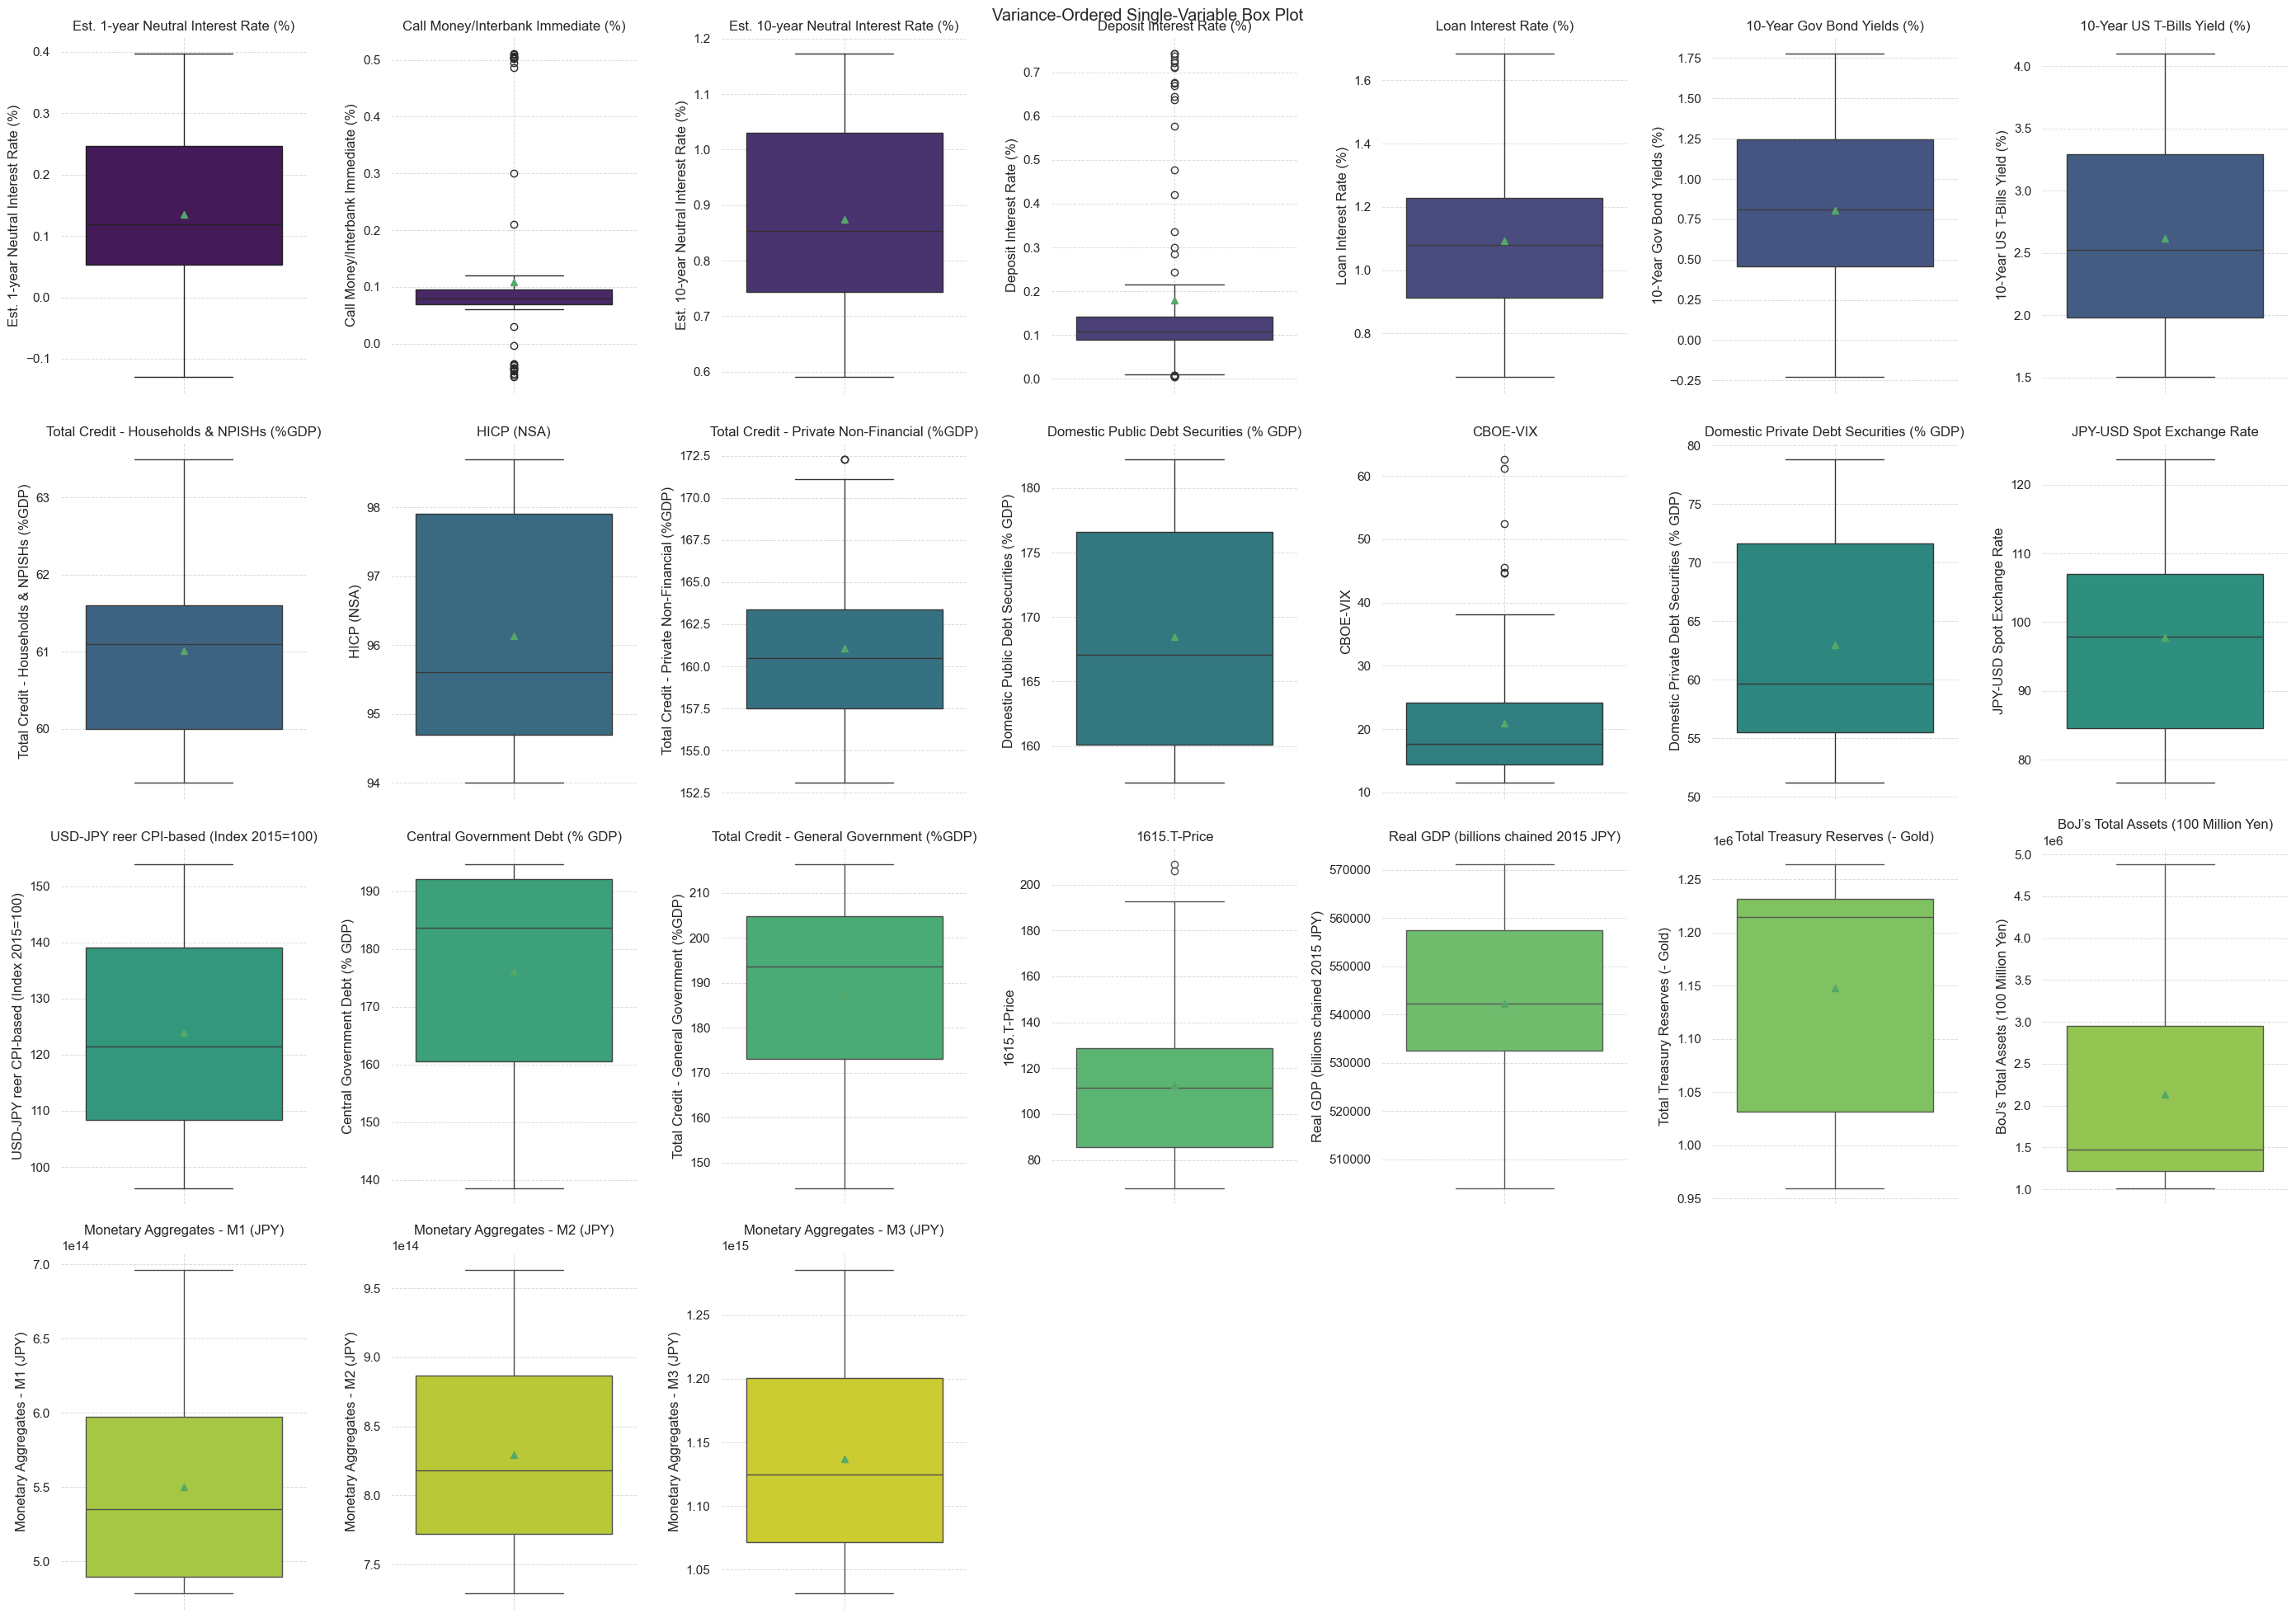

In [49]:
# Data Plotting (box-plot)

# General Layout (column and rows enumeration, figure's size, sub_plot)
# Sorting variables by std (so that logs variable move to the right-hand side, for better readibility)
df = jp_aggregated_df.copy()
df = df.drop(columns=["Country", "Time"]).dropna()

# Variance sorting
statistics = pd.DataFrame({
    "var": df.var(ddof=1, skipna=True),
    "n": df.count()
})
statistics = statistics[statistics["n"] >= 2].sort_values("var", ascending=True)

# List of explanatory variables to plot from the general train dataset jp_aggregated_kde
X = statistics.index.tolist()

# We define the palette following past graphs design
pal = sns.color_palette("viridis", n_colors=len(X))

# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 7
rows = int(np.ceil(len(X) / cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4 * cols, 5 * rows))
axes = np.array(axes).flatten()

# Boxplot setup
for i, col in enumerate(X):
    sns.boxplot(
        data=df,
        y=col,
        ax=axes[i],
        color=pal[i],        
        showmeans=True
    )
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Variance-Ordered Single-Variable Box Plot")
plt.tight_layout()
plt.show()

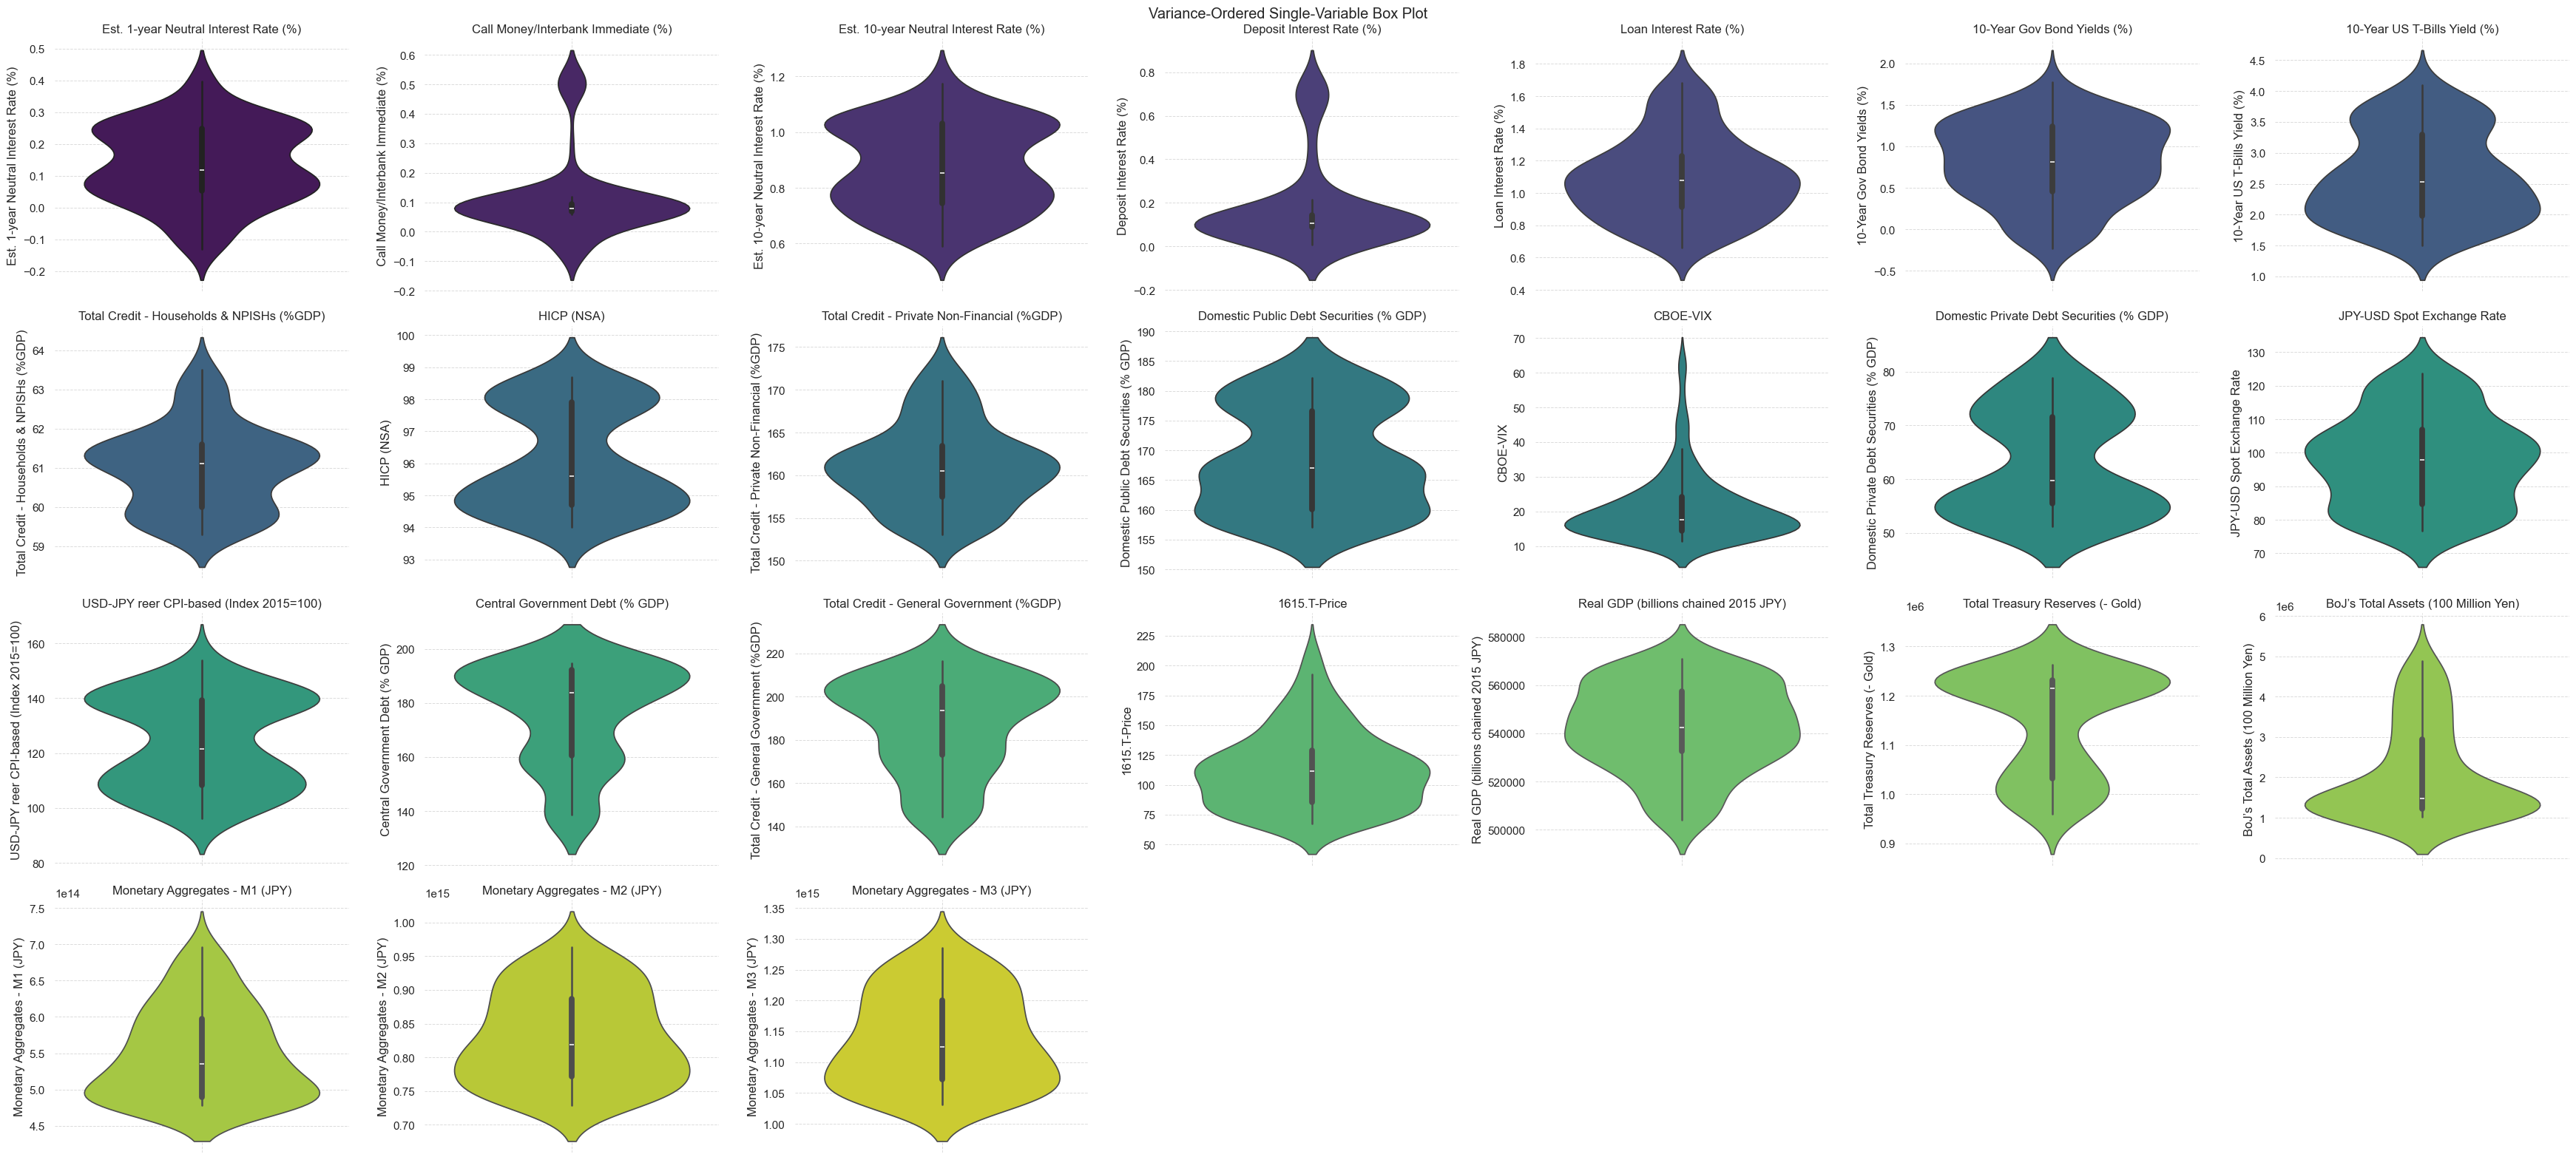

In [50]:
# Data Plotting (violin-plot)
# Same code as box-plots

# General Layout (column and rows enumeration, figure's size, sub_plot)
# Sorting variables by std (so that logs variable move to the right-hand side, for better readibility)
df = jp_aggregated_df.copy()
df = df.drop(columns=["Country", "Time"]).dropna()

# Variance sorting
statistics = pd.DataFrame({
    "var": df.var(ddof=1, skipna=True),
    "n": df.count()
})
statistics = statistics[statistics["n"] >= 2].sort_values("var", ascending=True)

# List of explanatory variables to plot from the general train dataset jp_aggregated_kde
X = statistics.index.tolist()

# We define the palette following past graphs design
pal = sns.color_palette("viridis", n_colors=len(X))

# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 7
rows = int(np.ceil(len(X) / cols))
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
axes = np.array(axes).flatten()

# Boxplot setup
for i, col in enumerate(X):
    sns.violinplot(
        data=df,
        y=col,
        ax=axes[i],
        color=pal[i]
    )
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

    for spine in axes[i].spines.values():
        spine.set_visible(False)

# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Variance-Ordered Single-Variable Box Plot")
plt.tight_layout()
plt.show()

C:\Users\eland\AppData\Local\Temp\ipykernel_15168\1872954939.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


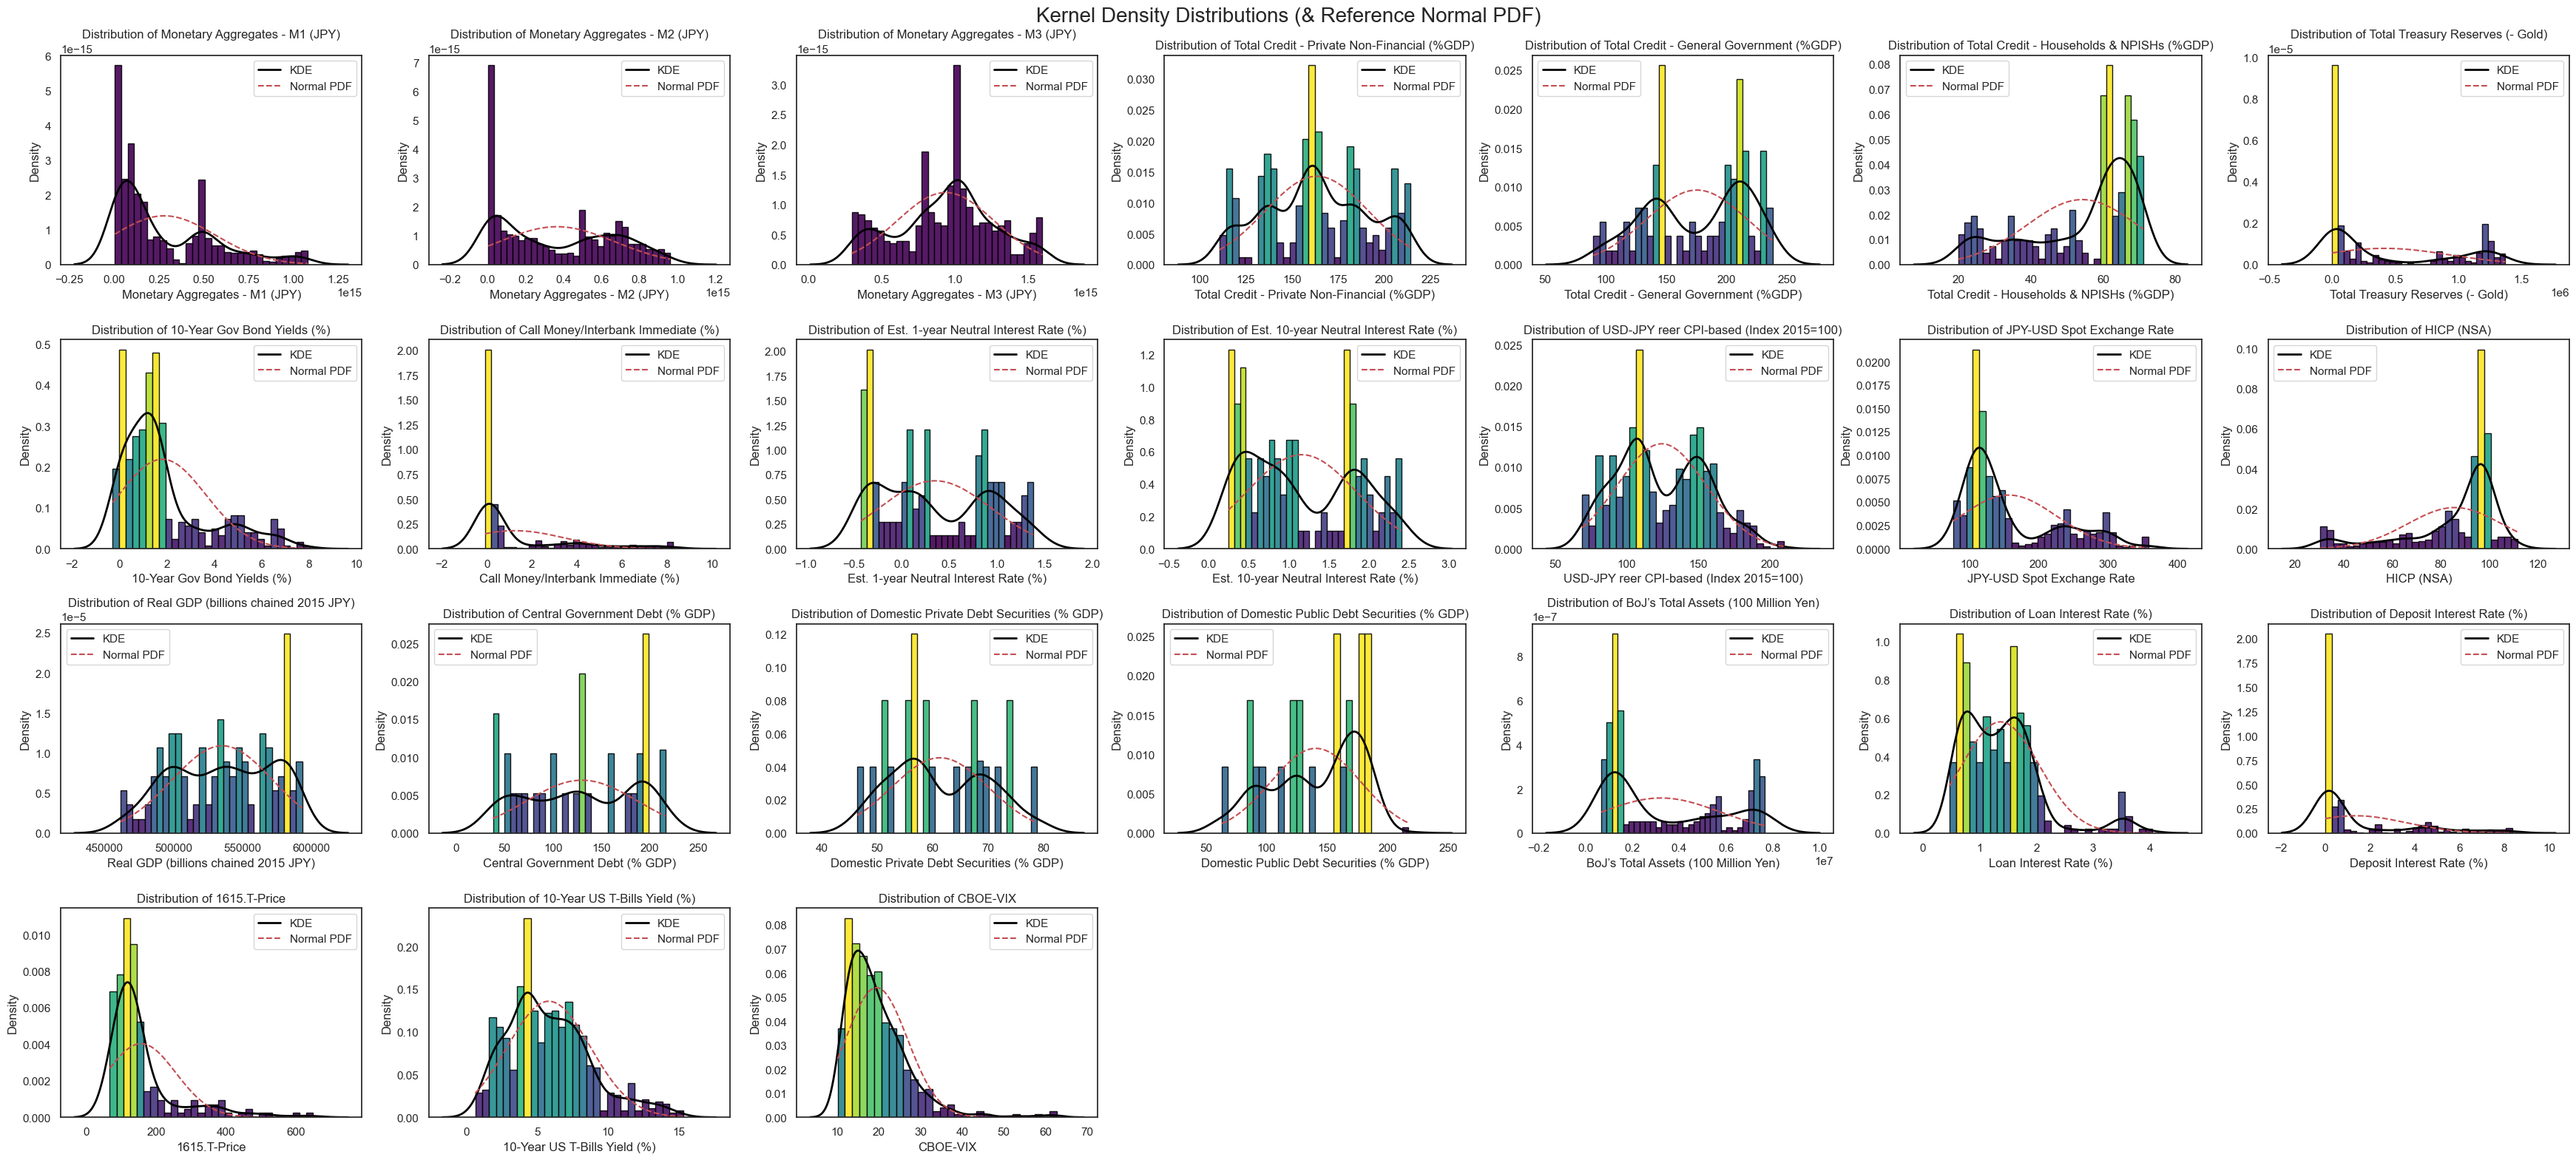

In [51]:
# Data Plotting (variable distribution with respect to the theoretical normal)
# General Layout (column and rows enumeration, figure's size, sub_plot)
cols = 7
jp_aggregated_kde = jp_aggregated_df.drop(columns=["Country", "Time"])
num_vars = jp_aggregated_kde.shape[1]
rows = int(np.ceil(num_vars / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = np.ravel(axes)

# Colormap
cmap = cm.get_cmap("viridis")

# Iteration per each variable in jp_aggregated_df (var_i=location of the variable based on index, col_name = variable name)
for i, col in enumerate(jp_aggregated_kde.columns):
    data = jp_aggregated_kde[col].dropna()
# Kernel density distribution of i
# We discard the NaN observations we mentioned earlier
    counts, bins = np.histogram(data, bins=30, density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    widths = np.diff(bins)
# Normalized densities for color mapping
    vmin, vmax = counts.min(), counts.max()
    if np.isclose(vmin, vmax):
        colors = cmap(np.zeros_like(counts))
    else:
        norm_cmap = Normalize(vmin=vmin, vmax=vmax)
        colors = cmap(norm_cmap(counts))
# Bins definition
    axes[i].bar(bin_centers, counts, width=widths, color=colors, edgecolor="black", alpha=0.9)
# KDE
    sns.kdeplot(data, ax=axes[i], color="black", linewidth=2, label="KDE")
# Normal PDF
    mu, std = data.mean(), data.std(ddof=1)
    x = np.linspace(bins.min(), bins.max(), 200)
    axes[i].plot(x, norm.pdf(x, mu, std), "r--", label="Normal PDF")

    axes[i].set_title(f"Distribution of {col}")
    axes[i].legend()
# Deletion of unused subplots (we have less variables than available slots for subplots on the page)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Kernel Density Distributions (& Reference Normal PDF)", fontsize=20)
plt.tight_layout()
plt.show()

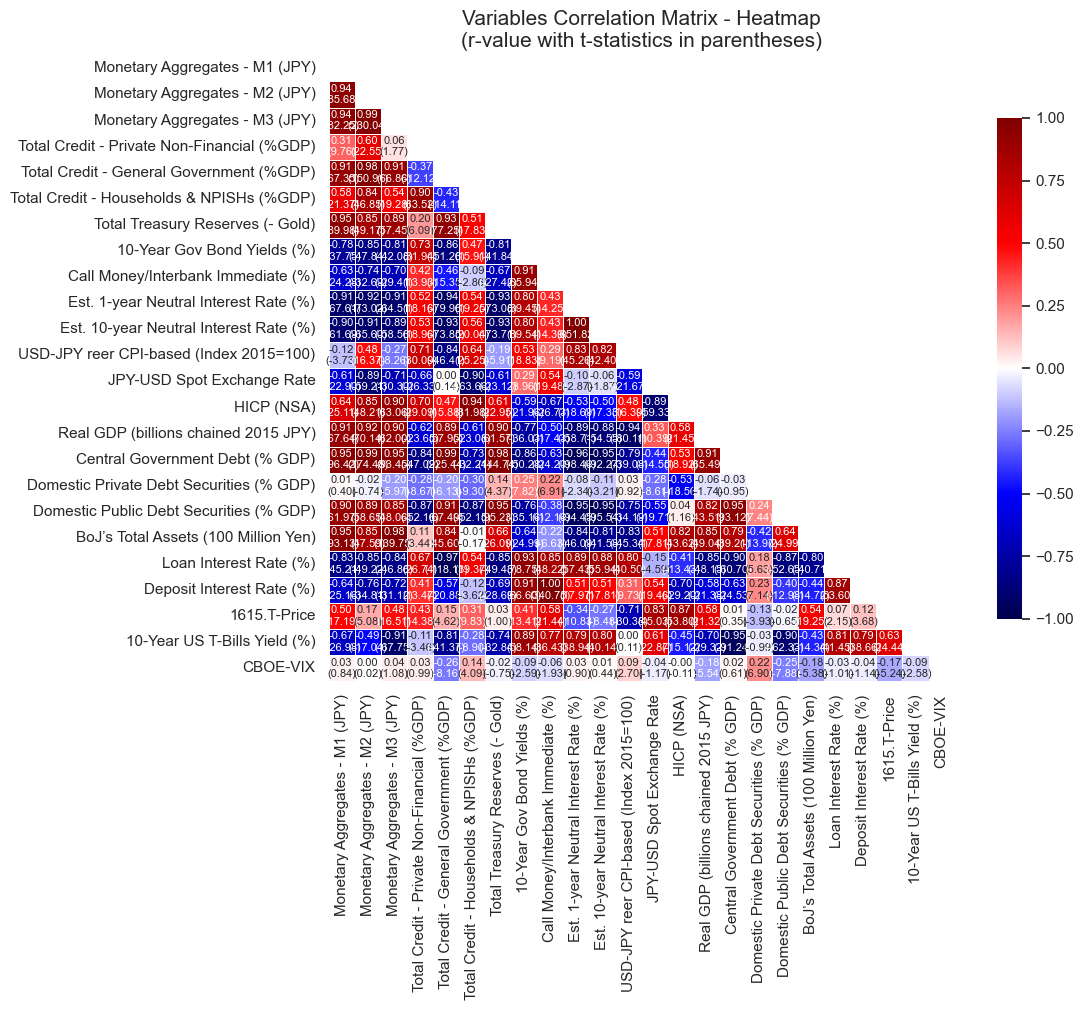

In [52]:
# Data Plotting (Correlation Heatmap)

# Keep only numeric columns
Xy = [col for col in jp_aggregated_df.columns if pd.api.types.is_numeric_dtype(jp_aggregated_df[col])]

# Correlation matrix (restricted to selected variables)
corr_matrix = jp_aggregated_df[Xy].corr()

# Sample size
n = jp_aggregated_df.shape[0]

# t-statistics derived from correlation values
with np.errstate(divide="ignore", invalid="ignore"):
    t_stat_matrix = corr_matrix * np.sqrt((n - 2) / (1 - corr_matrix**2))
    t_stat_matrix = t_stat_matrix.round(2)

# For each cell, we want to have both the correlation index, as well as the just computed t-statistics
annot_matrix = corr_matrix.copy().astype(str)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
# We only want to keep the lower triangle and diagonal of the full correlation matrix
        if i >= j: 
            r = corr_matrix.iloc[i, j]
            t = t_stat_matrix.iloc[i, j]
            annot_matrix.iloc[i, j] = f"{r:.2f}\n({t:.2f})"
        else:
            annot_matrix.iloc[i, j] = ""

# We manually hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat-map plot
# General Layout (figure's size and style)
plt.figure(figsize=(12, 10))
sns.set(style="white")

sns.heatmap(corr_matrix,
            mask=mask,
            annot=annot_matrix,
            fmt="",               
            cmap="seismic",         
            vmin=-1, vmax=1,       
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 8}) 

plt.title("Variables Correlation Matrix - Heatmap\n(r-value with t-statistics in parentheses)", 
          fontsize=15)
plt.tight_layout()
plt.show()

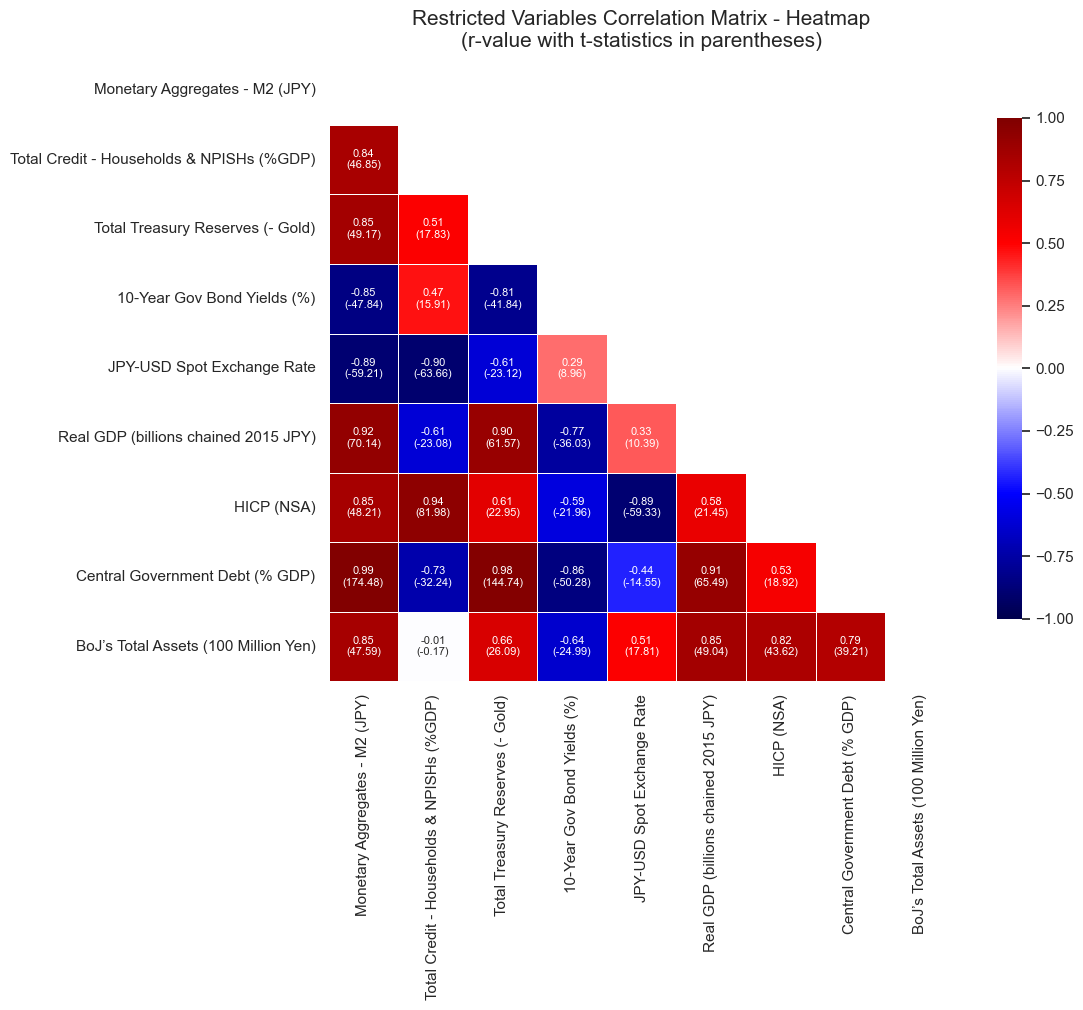

In [53]:
# Data Plotting (Reduced Correlation Heatmap)
# (!!!) We only target representative variables for each metrics group for better visualization 

# Keep only numeric columns
Xy = [col for col in jp_aggregated_df[["Monetary Aggregates - M2 (JPY)",
                                       "Total Credit - Households & NPISHs (%GDP)",
                                       "Total Treasury Reserves (- Gold)",
                                       "10-Year Gov Bond Yields (%)",
                                       "JPY-USD Spot Exchange Rate",
                                       "Real GDP (billions chained 2015 JPY)",
                                       "HICP (NSA)",
                                       "Central Government Debt (% GDP)",
                                       "BoJ’s Total Assets (100 Million Yen)"
                                       ]].columns if pd.api.types.is_numeric_dtype(jp_aggregated_df[col])]

# Correlation matrix (restricted to selected variables)
corr_matrix = jp_aggregated_df[Xy].corr()

# Sample size
n = jp_aggregated_df.shape[0]

# t-statistics derived from correlation values
with np.errstate(divide="ignore", invalid="ignore"):
    t_stat_matrix = corr_matrix * np.sqrt((n - 2) / (1 - corr_matrix**2))
    t_stat_matrix = t_stat_matrix.round(2)

# For each cell, we want to have both the correlation index, as well as the just computed t-statistics
annot_matrix = corr_matrix.copy().astype(str)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
# We only want to keep the lower triangle and diagonal of the full correlation matrix
        if i >= j: 
            r = corr_matrix.iloc[i, j]
            t = t_stat_matrix.iloc[i, j]
            annot_matrix.iloc[i, j] = f"{r:.2f}\n({t:.2f})"
        else:
            annot_matrix.iloc[i, j] = ""

# We manually hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat-map plot
# General Layout (figure's size and style)
plt.figure(figsize=(12, 10))
sns.set(style="white")

sns.heatmap(corr_matrix,
            mask=mask,
            annot=annot_matrix,
            fmt="",               
            cmap="seismic",         
            vmin=-1, vmax=1,       
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 8}) 

plt.title("Restricted Variables Correlation Matrix - Heatmap\n(r-value with t-statistics in parentheses)", 
          fontsize=15)
plt.tight_layout()
plt.show()

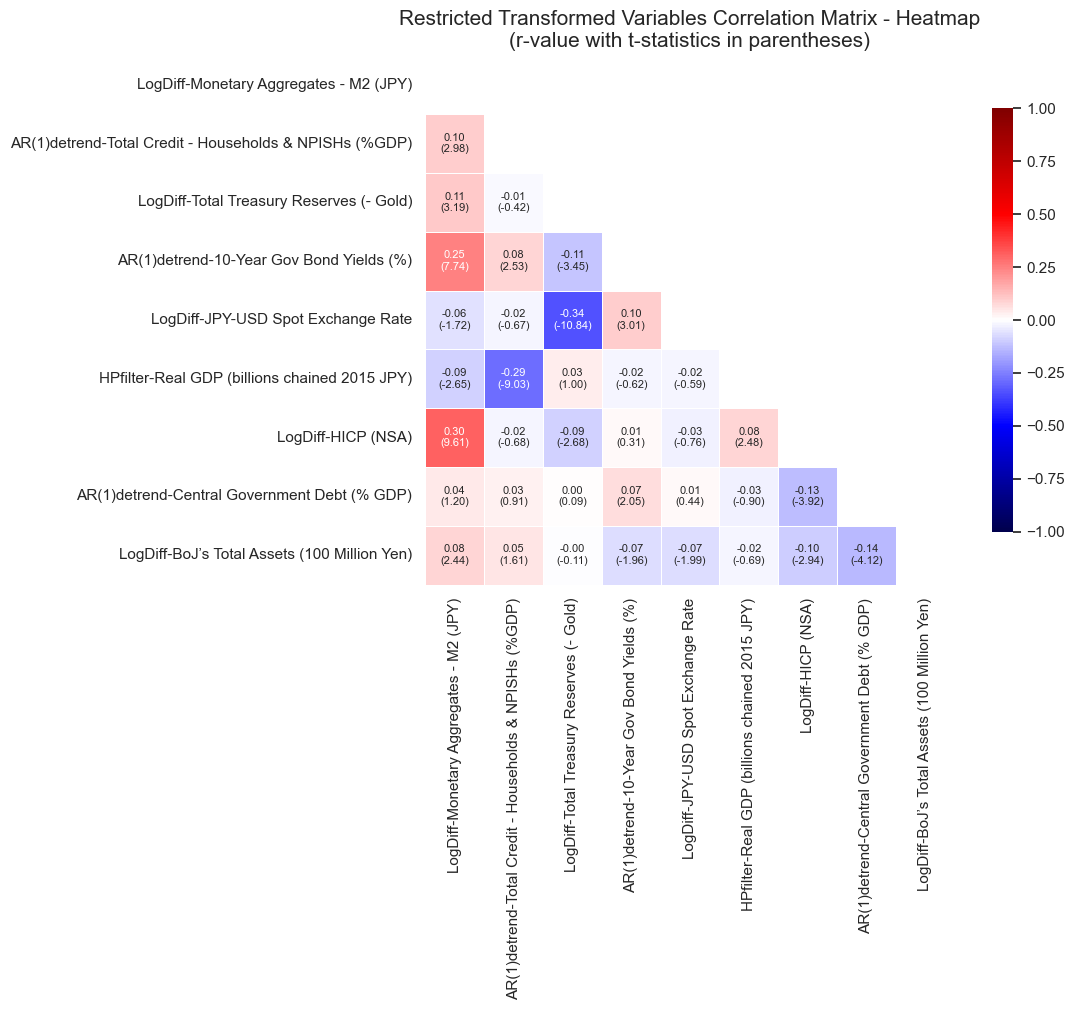

In [54]:
# Data Plotting (Reduced Transformed Variables Correlation Heatmap)
# (!!!) We only target representative variables for each metrics group for better visualization 
# (!!!) Quite good, cuz we managed to remove common trends, mechanical persistence, scale effects

# Keep only numeric columns
Xy = [col for col in jp_trans_df[["LogDiff-Monetary Aggregates - M2 (JPY)",
                                  "AR(1)detrend-Total Credit - Households & NPISHs (%GDP)",
                                  "LogDiff-Total Treasury Reserves (- Gold)",
                                  "AR(1)detrend-10-Year Gov Bond Yields (%)",
                                  "LogDiff-JPY-USD Spot Exchange Rate",
                                  "HPfilter-Real GDP (billions chained 2015 JPY)",
                                  "LogDiff-HICP (NSA)",
                                  "AR(1)detrend-Central Government Debt (% GDP)",
                                  "LogDiff-BoJ’s Total Assets (100 Million Yen)"
                                ]].columns if pd.api.types.is_numeric_dtype(jp_trans_df[col])]

# Correlation matrix (restricted to selected variables)
corr_matrix = jp_trans_df[Xy].corr()

# Sample size
n = jp_aggregated_df.shape[0]

# t-statistics derived from correlation values
with np.errstate(divide="ignore", invalid="ignore"):
    t_stat_matrix = corr_matrix * np.sqrt((n - 2) / (1 - corr_matrix**2))
    t_stat_matrix = t_stat_matrix.round(2)

# For each cell, we want to have both the correlation index, as well as the just computed t-statistics
annot_matrix = corr_matrix.copy().astype(str)

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
# We only want to keep the lower triangle and diagonal of the full correlation matrix
        if i >= j: 
            r = corr_matrix.iloc[i, j]
            t = t_stat_matrix.iloc[i, j]
            annot_matrix.iloc[i, j] = f"{r:.2f}\n({t:.2f})"
        else:
            annot_matrix.iloc[i, j] = ""

# We manually hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Heat-map plot
# General Layout (figure's size and style)
plt.figure(figsize=(12, 10))
sns.set(style="white")

sns.heatmap(corr_matrix,
            mask=mask,
            annot=annot_matrix,
            fmt="",               
            cmap="seismic",         
            vmin=-1, vmax=1,       
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8},
            annot_kws={"size": 8}) 

plt.title("Restricted Transformed Variables Correlation Matrix - Heatmap\n(r-value with t-statistics in parentheses)", 
          fontsize=15)
plt.tight_layout()
plt.show()

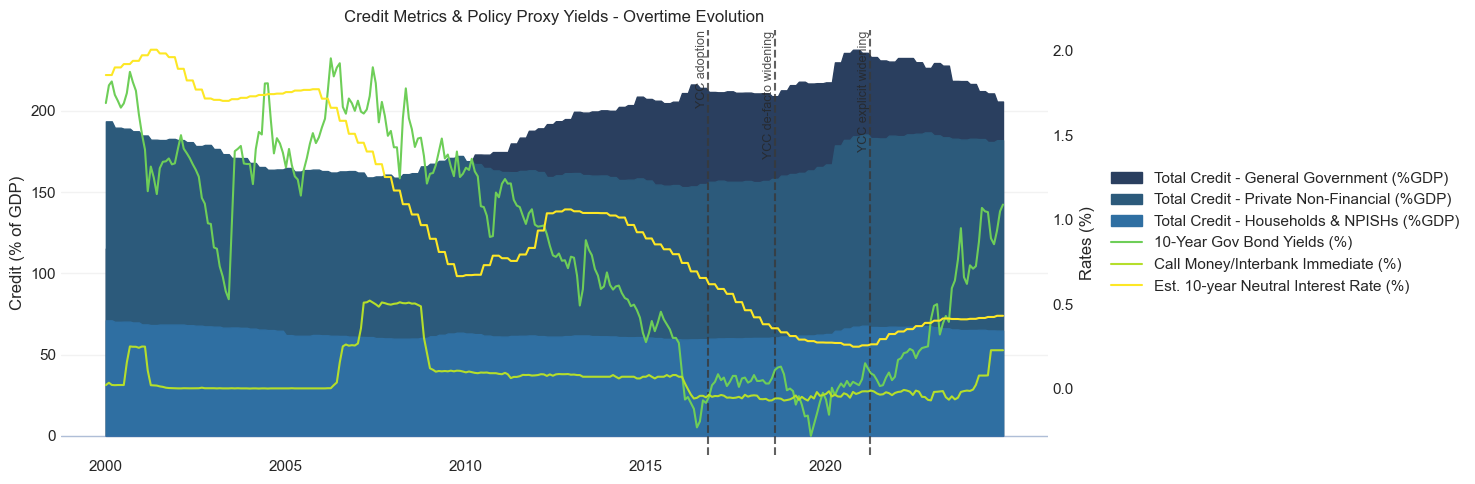

In [55]:
# Overtime Plotting - Credit Metrics & Yield Metrics
df = jp_aggregated_df.copy()

# Target Metrics 
credit_metrics = ["Total Credit - General Government (%GDP)", 
                  "Total Credit - Private Non-Financial (%GDP)", 
                  "Total Credit - Households & NPISHs (%GDP)"
                  ]
yield_metrics = [
    "10-Year Gov Bond Yields (%)",
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.sort_values("Time").set_index("Time")
df = df.loc[df.index.year >= 2000]
df = df.loc[df.index.year <= 2024]
plot_cols = credit_metrics + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Palette
credit_colors = [
    "#2a3f5f",  
    "#2c5a7b",  
    "#2f6fa2"   
]
# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Credit Metrics (Axis 1)
for i, col in enumerate(credit_metrics):
    s = df[col]
    ax1.fill_between(s.index, 0, s, color=credit_colors[i], alpha=1.0, label=col)
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC Explicit Widening Line (2016-09-21)
explicit_widen_date = pd.Timestamp("2021-03-19")
ax1.axvline(
    explicit_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    explicit_widen_date,
    ax1.get_ylim()[1],
    "YCC explicit widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
ax1.set_ylabel("Credit (% of GDP)")
ax1.axhline(0, lw=1, alpha=0.4)

# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Cosmetics 
for ax in (ax1, ax2):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(
    h1 + h2,
    l1 + l2,
    loc="upper left",
    bbox_to_anchor=(1.05, 0.7),
    frameon=False,
)
ax1.set_title("Credit Metrics & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()

C:\Users\eland\AppData\Local\Temp\ipykernel_15168\2829999464.py:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  debt_y = df[debt_metrics].resample("Y").mean()
C:\Users\eland\AppData\Local\Temp\ipykernel_15168\2829999464.py:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  central_y = df[central_debt].resample("Y").mean()


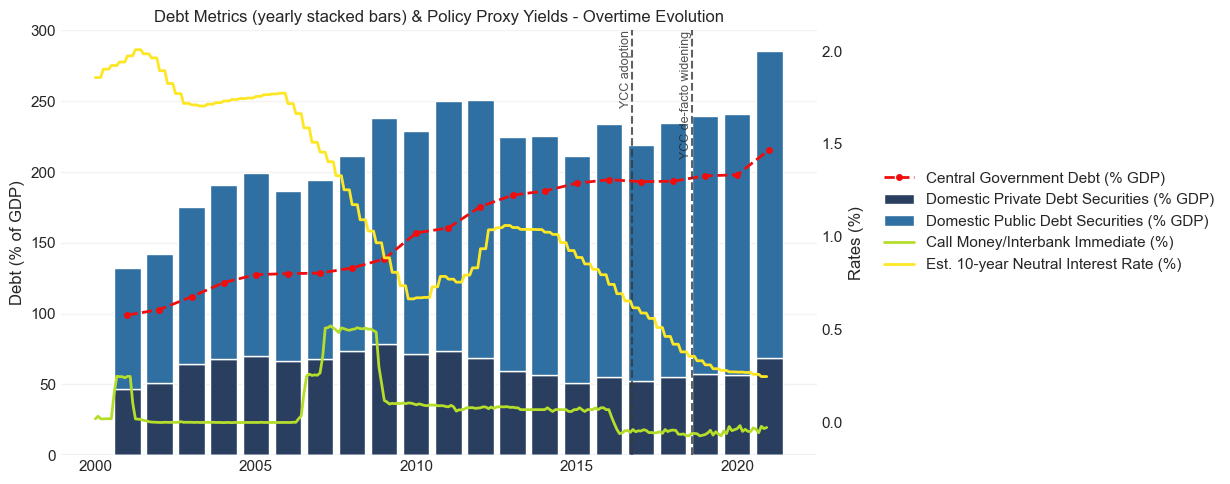

In [56]:
# Overtime Plotting - Debt Metrics & Yield Metrics
df = jp_aggregated_df.copy()

debt_metrics = [
    "Domestic Private Debt Securities (% GDP)", 
    "Domestic Public Debt Securities (% GDP)"
]
central_debt = "Central Government Debt (% GDP)"
yield_metrics = [
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]

# Set-Up
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["Time"]).sort_values("Time").set_index("Time")
df = df.loc[(df.index.year >= 2000) & (df.index.year <= 2020)]
plot_cols = debt_metrics + [central_debt] + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")
# From monthly to yearly bins (year average + stacking) for debt metrics
debt_y = df[debt_metrics].resample("Y").mean()
central_y = df[central_debt].resample("Y").mean()
# (!!!) We keep monthly for yields
yields_m = df[yield_metrics]

# Color Palette
debt_colors = [
    "#2a3f5f",  
    "#2f6fa2"   
]
yield_colors  = ["#b5de2b", "#fde725"]

# General Layout and Settings
fig, ax1 = plt.subplots(figsize=(15, 5))
xq = debt_y.index
bar_width_days = 300
pos_bottom = np.zeros(len(debt_y))
neg_bottom = np.zeros(len(debt_y))

# Stacked Histogram with individual debt metrics for public and private debt
# (!!!) Central government debt is plot as separate line 
for i, col in enumerate(debt_metrics):
    y = debt_y[col].to_numpy(dtype=float)
    y = np.nan_to_num(y, nan=0.0)
    y_pos = np.where(y > 0, y, 0.0)
    y_neg = np.where(y < 0, y, 0.0)
    ax1.bar(xq, y_pos, bottom=pos_bottom, width=bar_width_days,
            color=debt_colors[i], alpha=1.0, label=col, align="center")
    ax1.bar(xq, y_neg, bottom=neg_bottom, width=bar_width_days,
            color=debt_colors[i], alpha=1.0, label="_nolegend_", align="center")
    pos_bottom += y_pos
    neg_bottom += y_neg

ax1.plot(
    central_y.index, central_y.values,
    color="#f00d0d", lw=2, ls="--",
    marker="o", markersize=4,
    label=central_debt, zorder=5
)
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
ax1.set_ylabel("Debt (% of GDP)")
ax1.axhline(0, lw=1, alpha=0.4)

# Yields Lines
ax2 = ax1.twinx()
xm = yields_m.index
for col, c in zip(yield_metrics, yield_colors):
    ax2.plot(xm, yields_m[col], lw=2, ls="-", color=c, label=col)
ax2.set_ylabel("Rates (%)")

# Cosmetics
for ax in (ax1, ax2):
    for side in ("top", "right", "left", "bottom"):
        ax.spines[side].set_visible(False)
    ax.tick_params(axis="both", length=0)
years = df.index.year
unique_years = sorted(set(years))
step = 5
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)
ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(
    h1 + h2,
    l1 + l2,
    loc="upper left",
    bbox_to_anchor=(1.07, 0.7),
    frameon=False,
)
ax1.set_title("Debt Metrics (yearly stacked bars) & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

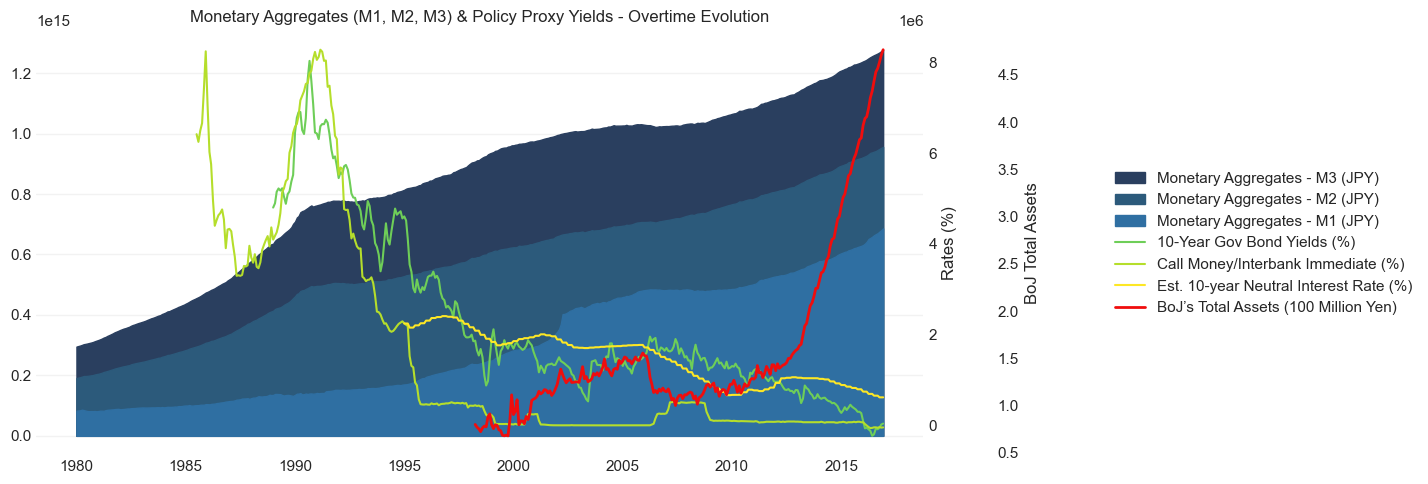

In [57]:
# Overtime Plotting - Monetary Aggregates & Yield Metrics
df = jp_aggregated_df.copy()

# Target Metrics
# (!!!) From broader to narrower 
monetary_aggregates = ["Monetary Aggregates - M3 (JPY)",
                       "Monetary Aggregates - M2 (JPY)", 
                       "Monetary Aggregates - M1 (JPY)"
                      ]
boj_ta = "BoJ’s Total Assets (100 Million Yen)"
yield_metrics = [
    "10-Year Gov Bond Yields (%)",
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]

# Set-Up
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["Time"]).sort_values("Time").set_index("Time")
df = df.loc[(df.index.year >= 1980) & (df.index.year < 2017)]
plot_cols = monetary_aggregates + [boj_ta] + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Color Palette
monetary_colors = [
    "#2a3f5f",  
    "#2c5a7b",  
    "#2f6fa2"
]

# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Monetary Aggregates (Axis 1)
# (!!!) Since monetary aggregates are nested measures, they all need to start from the same bottom bound (zero)
# M1 (narrow money): currency (banknotes and coins) in circulation and overnight deposits
# M2 (intermediate money): M1 + deposits with an agreed maturity of up to two years and deposits redeemable at notice of up to three months
# M3 (broad money): M2 + repurchase agreements, money market fund shares/units, and debt securities with a maturity of up to two years issued by MFIs
cum = np.zeros(len(df))
for i, col in enumerate(monetary_aggregates):
    s = df[col].to_numpy(dtype=float)
    s = np.nan_to_num(s, nan=0.0)
    ax1.fill_between(
        df.index,
        cum,
        cum + s,
        color=monetary_colors[i],
        alpha=1.0,
        label=col
    )
# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Line Plotting for BoJ Total Assets (Axis 3)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 50))
ax3.plot(
    df.index,
    df[boj_ta],
    color="#f00d0d",
    lw=2,
    ls="-",
    label=boj_ta,
    zorder=6
)
ax3.set_ylabel("BoJ Total Assets")

# Cosmetics 
for ax in (ax1, ax2, ax3):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(
    h1 + h2 + h3,
    l1 + l2 + l3,
    loc="upper left",
    bbox_to_anchor=(1.2, 0.7),
    frameon=False,
)
ax1.set_title("Monetary Aggregates (M1, M2, M3) & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()

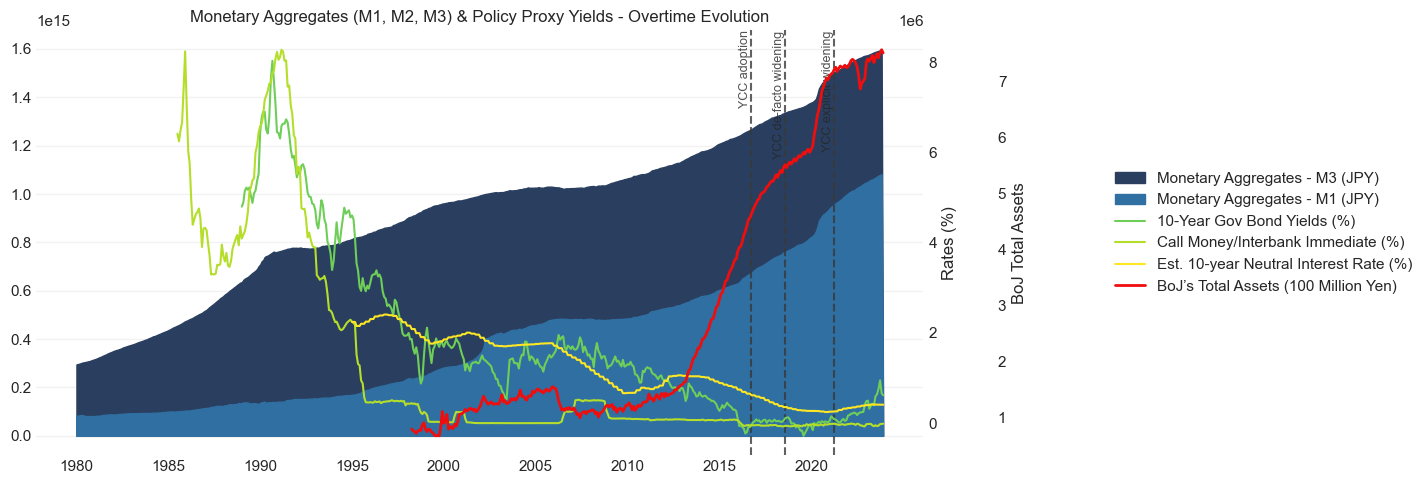

In [58]:
# Overtime Plotting - Restricted Monetary Aggregates & Yield Metrics
df = jp_aggregated_df.copy()

# Target Metrics 
monetary_aggregates = ["Monetary Aggregates - M3 (JPY)",
                       "Monetary Aggregates - M1 (JPY)"  
                      ]
boj_ta = "BoJ’s Total Assets (100 Million Yen)"
yield_metrics = [
    "10-Year Gov Bond Yields (%)",
    "Call Money/Interbank Immediate (%)",
    "Est. 10-year Neutral Interest Rate (%)",
]

# Set-Up
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["Time"]).sort_values("Time").set_index("Time")
df = df.loc[(df.index.year >= 1980) & (df.index.year < 2024)]
plot_cols = monetary_aggregates + [boj_ta] + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Color Palette
monetary_colors = [
    "#2a3f5f",    
    "#2f6fa2"
]

# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Monetary Aggregates (Axis 1)
cum = np.zeros(len(df))
for i, col in enumerate(monetary_aggregates):
    s = df[col].to_numpy(dtype=float)
    s = np.nan_to_num(s, nan=0.0)
    ax1.fill_between(
        df.index,
        cum,
        cum + s,
        color=monetary_colors[i],
        alpha=1.0,
        label=col
    )
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC Explicit Widening Line (2016-09-21)
explicit_widen_date = pd.Timestamp("2021-03-19")
ax1.axvline(
    explicit_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    explicit_widen_date,
    ax1.get_ylim()[1],
    "YCC explicit widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Line Plotting for BoJ Total Assets (Axis 3)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 50))
ax3.plot(
    df.index,
    df[boj_ta],
    color="#f00d0d",
    lw=2,
    ls="-",
    label=boj_ta,
    zorder=6
)
ax3.set_ylabel("BoJ Total Assets")

# Cosmetics 
for ax in (ax1, ax2, ax3):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(
    h1 + h2 + h3,
    l1 + l2 + l3,
    loc="upper left",
    bbox_to_anchor=(1.2, 0.7),
    frameon=False,
)
ax1.set_title("Monetary Aggregates (M1, M2, M3) & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()

### **7) TRANSFORMED DATA PLOTTING**

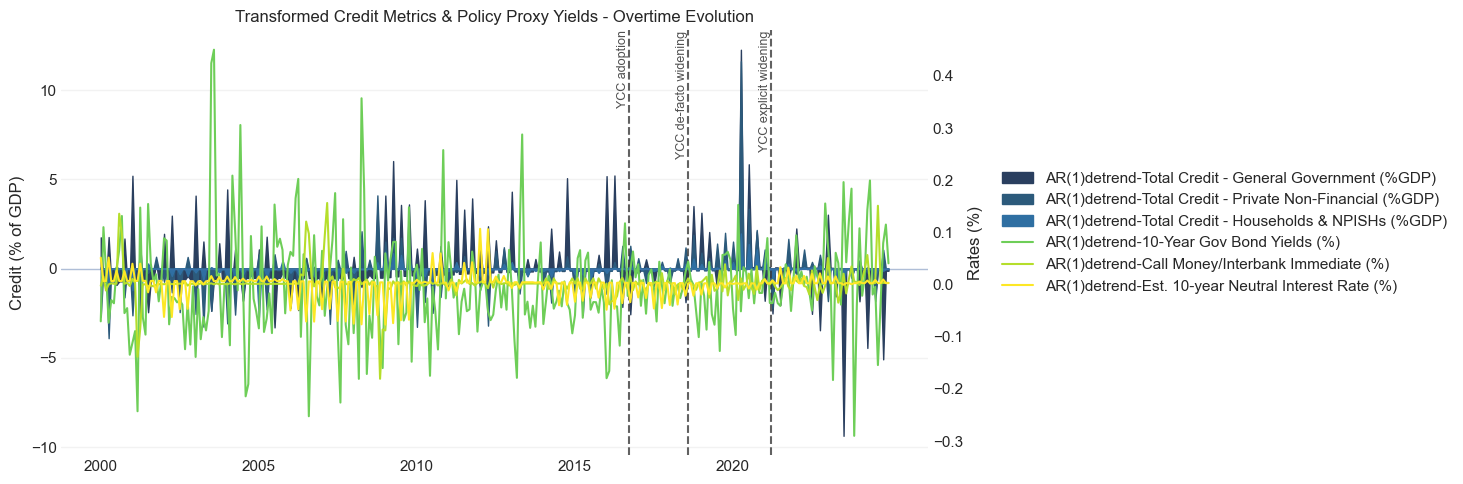

In [59]:
# Overtime Plotting - Transformed Credit Metrics & Yield Metrics
df = jp_trans_df.copy()

# Target Metrics 
credit_metrics = ["AR(1)detrend-Total Credit - General Government (%GDP)", 
                  "AR(1)detrend-Total Credit - Private Non-Financial (%GDP)", 
                  "AR(1)detrend-Total Credit - Households & NPISHs (%GDP)"
                  ]
yield_metrics = [
    "AR(1)detrend-10-Year Gov Bond Yields (%)",
    "AR(1)detrend-Call Money/Interbank Immediate (%)",
    "AR(1)detrend-Est. 10-year Neutral Interest Rate (%)",
]
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.sort_values("Time").set_index("Time")
df = df.loc[df.index.year >= 2000]
df = df.loc[df.index.year <= 2024]
plot_cols = credit_metrics + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Palette
credit_colors = [
    "#2a3f5f",  
    "#2c5a7b",  
    "#2f6fa2"   
]
# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Credit Metrics (Axis 1)
for i, col in enumerate(credit_metrics):
    s = df[col]
    ax1.fill_between(s.index, 0, s, color=credit_colors[i], alpha=1.0, label=col)
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC Explicit Widening Line (2016-09-21)
explicit_widen_date = pd.Timestamp("2021-03-19")
ax1.axvline(
    explicit_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    explicit_widen_date,
    ax1.get_ylim()[1],
    "YCC explicit widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
ax1.set_ylabel("Credit (% of GDP)")
ax1.axhline(0, lw=1, alpha=0.4)

# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["AR(1)detrend-10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="AR(1)detrend-10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["AR(1)detrend-Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="AR(1)detrend-Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["AR(1)detrend-Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="AR(1)detrend-Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Cosmetics 
for ax in (ax1, ax2):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(
    h1 + h2,
    l1 + l2,
    loc="upper left",
    bbox_to_anchor=(1.07, 0.7),
    frameon=False,
)
ax1.set_title("Transformed Credit Metrics & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()

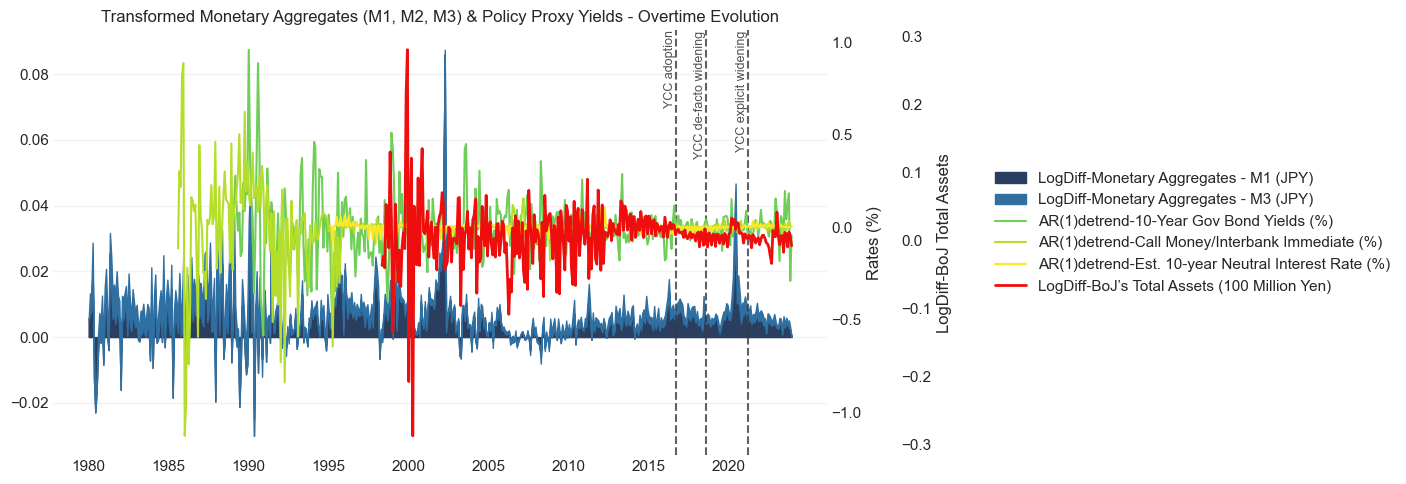

In [60]:
# Overtime Plotting - Transformed Restricted Monetary Aggregates & Yield Metrics
df = jp_trans_df.copy()

# Target Metrics 
monetary_aggregates = ["LogDiff-Monetary Aggregates - M1 (JPY)",  
                       "LogDiff-Monetary Aggregates - M3 (JPY)"
                      ]
boj_ta = "LogDiff-BoJ’s Total Assets (100 Million Yen)"
yield_metrics = [
    "AR(1)detrend-10-Year Gov Bond Yields (%)",
    "AR(1)detrend-Call Money/Interbank Immediate (%)",
    "AR(1)detrend-Est. 10-year Neutral Interest Rate (%)",
]

# Set-Up
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")
df = df.dropna(subset=["Time"]).sort_values("Time").set_index("Time")
df = df.loc[(df.index.year >= 1980) & (df.index.year < 2024)]
plot_cols = monetary_aggregates + [boj_ta] + yield_metrics
df = df[plot_cols].apply(pd.to_numeric, errors="coerce")

# Color Palette
monetary_colors = [
    "#2a3f5f",    
    "#2f6fa2"
]

# General Layout
fig, ax1 = plt.subplots(figsize=(15, 5))

# Fill-Between Plotting for Monetary Aggregates (Axis 1)
cum = np.zeros(len(df))
for i, col in enumerate(monetary_aggregates):
    s = df[col].to_numpy(dtype=float)
    s = np.nan_to_num(s, nan=0.0)
    ax1.fill_between(
        df.index,
        cum,
        cum + s,
        color=monetary_colors[i],
        alpha=1.0,
        label=col
    )
    cum += s
# YCC Adoption Line (2016-09-21)
ycc_date = pd.Timestamp("2016-09-21")
ax1.axvline(
    ycc_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    ycc_date,
    ax1.get_ylim()[1],
    "YCC adoption",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC De-facto Widening Line (2016-09-21)
defacto_widen_date = pd.Timestamp("2018-07-31")
ax1.axvline(
    defacto_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    defacto_widen_date,
    ax1.get_ylim()[1],
    "YCC de-facto widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# YCC Explicit Widening Line (2016-09-21)
explicit_widen_date = pd.Timestamp("2021-03-19")
ax1.axvline(
    explicit_widen_date,
    color="#393939",
    lw=1.5,
    ls="--",
    alpha=0.8,
    zorder=10
)
ax1.text(
    explicit_widen_date,
    ax1.get_ylim()[1],
    "YCC explicit widening",
    rotation=90,
    va="top",
    ha="right",
    fontsize=9,
    alpha=0.8
)
# Line Plotting for Yield Rates (Axis 2)
ax2 = ax1.twinx()
yield_kwargs = dict(lw=2, ls="--")
ax2.plot(df.index, df["AR(1)detrend-10-Year Gov Bond Yields (%)"],
         color="#6ece58", label="AR(1)detrend-10-Year Gov Bond Yields (%)")
ax2.plot(df.index, df["AR(1)detrend-Call Money/Interbank Immediate (%)"],
         color="#b5de2b", label="AR(1)detrend-Call Money/Interbank Immediate (%)")
ax2.plot(df.index, df["AR(1)detrend-Est. 10-year Neutral Interest Rate (%)"],
         color="#fde725", label="AR(1)detrend-Est. 10-year Neutral Interest Rate (%)")
ax2.set_ylabel("Rates (%)")

# Line Plotting for BoJ Total Assets (Axis 3)
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 50))
ax3.plot(
    df.index,
    df[boj_ta],
    color="#f00d0d",
    lw=2,
    ls="-",
    label=boj_ta,
    zorder=6
)
ax3.set_ylabel("LogDiff-BoJ Total Assets")

# Cosmetics 
for ax in (ax1, ax2, ax3):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(axis="both", length=0)
# (!!!) X axis correction
years = df.index.year
unique_years = sorted(set(years))
step = 5 
filtered_years = [y for y in unique_years if y % step == 0]
year_ticks = [df.index[years == y][0] for y in filtered_years]
ax1.set_xticks(year_ticks)
ax1.set_xticklabels(filtered_years)

ax1.grid(True, axis="y", alpha=0.25)
ax1.grid(False, axis="x")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
h3, l3 = ax3.get_legend_handles_labels()
ax1.legend(
    h1 + h2 + h3,
    l1 + l2 + l3,
    loc="upper left",
    bbox_to_anchor=(1.2, 0.7),
    frameon=False,
)
ax1.set_title("Transformed Monetary Aggregates (M1, M2, M3) & Policy Proxy Yields - Overtime Evolution")

plt.tight_layout()
plt.show()